In [1]:
import apache_beam   # Needs to be imported separately to avoid TypingError
import weatherbench2
import xarray as xr
from weatherbench2 import config
import numpy as np
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
forecast_path = 'gs://weatherbench2/datasets/hres/2016-2022-0012-64x32_equiangular_with_poles_conservative.zarr'
obs_path = 'gs://weatherbench2/datasets/era5/1959-2022-6h-64x32_equiangular_with_poles_conservative.zarr'
climatology_path = 'gs://weatherbench2/datasets/era5-hourly-climatology/1990-2019_6h_64x32_equiangular_with_poles_conservative.zarr'

In [3]:
observations = xr.open_zarr(obs_path)


In [4]:
observations

<xarray.Dataset>
Dimensions:                                           (time: 92040,
                                                       longitude: 64,
                                                       latitude: 32, level: 13)
Coordinates:
  * latitude                                          (latitude) float64 -90....
  * level                                             (level) int64 50 ... 1000
  * longitude                                         (longitude) float64 0.0...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/38)
    10m_u_component_of_wind                           (time, longitude, latitude) float32 dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    10m_v_component_of_wind                           (time, longitude, latitude) float32 dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    10m_wind_speed                                    (time, longitude, latitude) float32 dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    2m_temperature                                    (time, longitude, latitude) float32 dask.array<chunksize=(100, 64, 32), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (longitude, latitude) float32 dask.array<chunksize=(64, 32), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (longitude, latitude) float32 dask.array<chunksize=(64, 32), meta=np.ndarray>
    ...                                                ...
    type_of_high_vegetation                           (longitude, latitude) float32 dask.array<chunksize=(64, 32), meta=np.ndarray>
    type_of_low_vegetation                            (longitude, latitude) float32 dask.array<chunksize=(64, 32), meta=np.ndarray>
    u_component_of_wind                               (time, level, longitude, latitude) float32 dask.array<chunksize=(100, 13, 64, 32), meta=np.ndarray>
    v_component_of_wind                               (time, level, longitude, latitude) float32 dask.array<chunksize=(100, 13, 64, 32), meta=np.ndarray>
    vertical_velocity                                 (time, level, longitude, latitude) float32 dask.array<chunksize=(100, 13, 64, 32), meta=np.ndarray>
    wind_speed                                        (time, level, longitude, latitude) float32 dask.array<chunksize=(100, 13, 64, 32), meta=np.ndarray>

In [5]:
forecasts = xr.open_zarr(forecast_path)

In [6]:
forecasts

<xarray.Dataset>
Dimensions:                   (time: 5114, prediction_timedelta: 41,
                               longitude: 64, latitude: 32, level: 13)
Coordinates:
  * latitude                  (latitude) float64 -90.0 -84.19 ... 84.19 90.0
  * level                     (level) int32 50 100 150 200 ... 700 850 925 1000
  * longitude                 (longitude) float64 0.0 5.625 ... 348.8 354.4
  * prediction_timedelta      (prediction_timedelta) timedelta64[ns] 00:00:00...
  * time                      (time) datetime64[ns] 2016-01-01 ... 2022-12-31...
Data variables: (12/16)
    10m_u_component_of_wind   (time, prediction_timedelta, longitude, latitude) float32 dask.array<chunksize=(4, 41, 64, 32), meta=np.ndarray>
    10m_v_component_of_wind   (time, prediction_timedelta, longitude, latitude) float32 dask.array<chunksize=(4, 41, 64, 32), meta=np.ndarray>
    10m_wind_speed            (time, prediction_timedelta, longitude, latitude) float32 dask.array<chunksize=(4, 41, 64, 32), meta=np.ndarray>
    2m_temperature            (time, prediction_timedelta, longitude, latitude) float32 dask.array<chunksize=(4, 41, 64, 32), meta=np.ndarray>
    geopotential              (time, prediction_timedelta, level, longitude, latitude) float32 dask.array<chunksize=(4, 41, 13, 64, 32), meta=np.ndarray>
    mean_sea_level_pressure   (time, prediction_timedelta, longitude, latitude) float32 dask.array<chunksize=(4, 41, 64, 32), meta=np.ndarray>
    ...                        ...
    total_precipitation_24hr  (time, prediction_timedelta, longitude, latitude) float32 dask.array<chunksize=(4, 41, 64, 32), meta=np.ndarray>
    total_precipitation_6hr   (time, prediction_timedelta, longitude, latitude) float32 dask.array<chunksize=(4, 41, 64, 32), meta=np.ndarray>
    u_component_of_wind       (time, prediction_timedelta, level, longitude, latitude) float32 dask.array<chunksize=(4, 41, 13, 64, 32), meta=np.ndarray>
    v_component_of_wind       (time, prediction_timedelta, level, longitude, latitude) float32 dask.array<chunksize=(4, 41, 13, 64, 32), meta=np.ndarray>
    vertical_velocity         (time, prediction_timedelta, level, longitude, latitude) float32 dask.array<chunksize=(4, 41, 13, 64, 32), meta=np.ndarray>
    wind_speed                (time, prediction_timedelta, level, longitude, latitude) float32 dask.array<chunksize=(4, 41, 13, 64, 32), meta=np.ndarray>

In [7]:
climatology = xr.open_zarr(climatology_path)
climatology

<xarray.Dataset>
Dimensions:                                      (hour: 4, dayofyear: 366,
                                                  longitude: 64, latitude: 32,
                                                  level: 13)
Coordinates:
  * dayofyear                                    (dayofyear) int64 1 2 ... 366
  * hour                                         (hour) int64 0 6 12 18
  * latitude                                     (latitude) float64 -90.0 ......
  * level                                        (level) int64 50 100 ... 1000
  * longitude                                    (longitude) float64 0.0 ... ...
Data variables: (12/28)
    10m_u_component_of_wind                      (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    10m_v_component_of_wind                      (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    10m_wind_speed                               (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    2m_temperature                               (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    geopotential                                 (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>
    mean_sea_level_pressure                      (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    ...                                           ...
    total_precipitation_6hr_seeps_dry_fraction   (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    total_precipitation_6hr_seeps_threshold      (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    u_component_of_wind                          (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>
    v_component_of_wind                          (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>
    vertical_velocity                            (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>
    wind_speed                                   (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>

In [8]:
climatology.sel(dayofyear=6, level=50, hour=0, latitude=-90.0, longitude=0.0)["geopotential"].values

array(201276.97, dtype=float32)

In [9]:
def climatology_model(climatology_data, variable, day_of_year, level=None, hour=None):
    # Extract the climatology data for the variable and, if applicable, the level
    if level:
        variable_climatology = climatology_data[variable].sel(level=level)
    else:
        variable_climatology = climatology_data[variable]

    if hour:
        variable_climatology = variable_climatology.sel(hour=hour)
    
    # Return the climatological average for the given day of the year and hour across all longtitude and latitude
    climatology_average = variable_climatology.sel(dayofyear=day_of_year).mean(dim=['hour'])

    return climatology_average

In [10]:
climatology.sel(dayofyear=1, level=50)["geopotential"]

<xarray.DataArray 'geopotential' (hour: 4, longitude: 64, latitude: 32)>
dask.array<getitem, shape=(4, 64, 32), dtype=float32, chunksize=(4, 64, 32), chunktype=numpy.ndarray>
Coordinates:
    dayofyear  int64 1
  * hour       (hour) int64 0 6 12 18
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
    level      int64 50
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [11]:
climatology_model(climatology, "geopotential", day_of_year=1, level=50)

<xarray.DataArray 'geopotential' (longitude: 64, latitude: 32)>
dask.array<mean_agg-aggregate, shape=(64, 32), dtype=float32, chunksize=(64, 32), chunktype=numpy.ndarray>
Coordinates:
    dayofyear  int64 1
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
    level      int64 50
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4

In [12]:
np.arange(0, 365)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
observations.sel(time=observations.time.dt.year == 1959).groupby('time.dayofyear').mean(dim='time')["geopotential"]

<xarray.DataArray 'geopotential' (dayofyear: 364, level: 13, longitude: 64,
                                  latitude: 32)>
dask.array<concatenate, shape=(364, 13, 64, 32), dtype=float32, chunksize=(1, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * dayofyear  (dayofyear) int64 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [14]:
import numpy as np
from scipy.stats import gaussian_kde
import dask
import dask.array as da

def climatology_probabilistic_model(obs_data, variable=None, day_of_year=None):
    """
    Create a probabilistic climatology model based on daily means for a specific year.

    Parameters:
    - obs_data (xarray.Dataset): Observed data containing time, longitude, latitude, level, and the chosen climate variable.
    - variable (str): The name of the climate variable to model (e.g., "temperature").
    - year (int): The year for which to calculate the climatology.

    """
    with dask.config.set(**{'array.slicing.split_large_chunks': True}):
        years_list = []
        for year in range(1959, 2022):
            years_list.append(year)
        predictions = np.array([])

        # Create empty arrays with these coordinates
        latitude_arr = xr.DataArray(obs_data.latitude.values, dims='latitude')
        level_arr = xr.DataArray(obs_data.level.values, dims='level')
        longitude_arr = xr.DataArray(obs_data.longitude.values, dims='longitude')
        dayofyear_arr = xr.DataArray(np.arange(1, 366), dims='dayofyear')

        # Create an empty dataset with these dimensions
        forecast_probabilities = xr.Dataset(
            {'latitude': latitude_arr, 'level': level_arr, 'longitude': longitude_arr, 'dayofyear': dayofyear_arr, 'years': np.array(years_list)}
        )
        # Add a new dimension and insert the value along that dimension
        count = 0
        for year in years_list:
            # Filter data for the chosen year
            obs_data_year = obs_data.sel(time=obs_data.time.dt.year == year)
            # Calculate daily means
            daily_means = obs_data_year.groupby('time.dayofyear').mean(dim='time')[variable]
            for day_of_year in daily_means["dayofyear"].values:
                forecast = daily_means.sel(dayofyear = day_of_year)
                forecast = forecast.expand_dims({'years': 1}, axis=0)
                forecast['years'] = np.array([year])
                forecast = forecast.expand_dims({'dayofyear': 1}, axis=0)
                forecast['dayofyear'] = np.array([day_of_year])
                forecast_probabilities = xr.merge([forecast_probabilities, forecast])
            return forecast_probabilities


In [21]:
import numpy as np
import dask
import dask.array as da
import xarray as xr
from scipy.stats import gaussian_kde


def climatology_model(obs_data, start_year, end_year, variable=None):
    """
    Create a probabilistic climatology model based on daily means for a range of years.

    Parameters:
    - obs_data (xarray.Dataset): Observed data containing time, longitude, latitude, level, and the chosen climate variable.
    - variable (str): The name of the climate variable to model (e.g., "temperature").

    Returns:
    - forecast_probabilities (xarray.Dataset): Probabilistic climatology model.
    """
    # Set the option to split large chunks
    with dask.config.set(**{'array.slicing.split_large_chunks': True}):
        print("debug")
        # Extract necessary data arrays
        years = np.arange(start_year, end_year)
        latitude_arr = obs_data.latitude.values
        level_arr = obs_data.level.values
        longitude_arr = obs_data.longitude.values

        # Create Dask arrays for latitude, level, longitude
        latitude_arr_da = da.from_array(latitude_arr, chunks='auto')
        level_arr_da = da.from_array(level_arr, chunks='auto')
        longitude_arr_da = da.from_array(longitude_arr, chunks='auto')
        print("end debug")
        # Create an empty dataset for forecast probabilities
        forecast_probabilities = xr.Dataset(
            {
                'dayofyear': ('dayofyear', np.arange(1, 366)),
                'level': ('level', level_arr_da),
                'longitude': ('longitude', longitude_arr_da),
                'latitude': ('latitude', latitude_arr_da),
                'years': ('years', years),
            }
        )
        counter = 0
        for year in years:
            print(f"start: {counter}")
            # Filter data for the chosen year
            obs_data_year = obs_data.sel(time=obs_data.time.dt.year == year)

            # Calculate daily means for the current year
            daily_means = obs_data_year.groupby('time.dayofyear').mean(dim='time')[variable]
            daily_means = daily_means.expand_dims({'years': 1}, axis=0)
            daily_means['years'] = np.array([year])
            print(f"middle 1: {counter}")
            # Create Dask arrays for daily_means
            daily_means_da = da.from_array(daily_means.values, chunks='auto')
            # Create the "geopotential" DataArray with explicit dimensions
            print(f"middle 2: {counter}")
            geopotential_da = xr.DataArray(
                daily_means_da,
                dims=('years', "dayofyear", "level", "longitude", "latitude"),
                coords={
                    "dayofyear": daily_means.dayofyear.values,
                    "level": level_arr_da,
                    "longitude": longitude_arr_da,
                    "latitude": latitude_arr_da,
                    "years": daily_means.years.values,
                },
            )
            print(f"end 1: {counter}")
            new_geopotential_da = {"geopotential": geopotential_da}
            # Set the values in the forecast_probabilities dataset for the current year
            forecast_probabilities = xr.merge([forecast_probabilities, new_geopotential_da])

            print(f"end cycle: {counter}")
            counter += 1
        return forecast_probabilities

# Example usage:
# forecast = climatology_probabilistic_model(obs_data, variable='temperature')
# print(forecast)


In [15]:
import xarray as xr
import numpy as np
from scipy.stats import norm

def estimate_gaussian_parameters(data, simplified=False):
    """
    Estimate Gaussian parameters (mean and standard deviation) for a data variable using annual means.

    Parameters:
    - data_variable (str): The name of the data variable for which to estimate parameters.
    - annual_averages (xarray.Dataset): Dataset containing annual means for different data variables.

    Returns:
    - mean (float): Estimated mean for the Gaussian model.
    - std_dev (float): Estimated standard deviation for the Gaussian model.
    """
    import xarray as xr
    import numpy as np
    from scipy.stats import norm

    # Load or create your xarray dataset here
    # Your dataset should have data variables named after years (e.g., "1959," "1960," etc.)

    # Calculate the mean across data variables (years) along the 'time' dimension
    mean_across_years = data.mean(dim='years')
    std_dev_across_years = data.std(dim='years')


    # Assuming you have std_dev_across_years and mean_across_years with the specified dimensions

    # Generate Gaussian predictions for each coordinate vectorized
    std_dev = std_dev_across_years["geopotential"].values
    mean = mean_across_years["geopotential"].values

    # Generate random samples following a Gaussian distribution for all coordinates
    samples = norm.rvs(loc=mean, scale=std_dev)
        
    samples_da = da.from_array(samples, chunks='auto')
    gaussian_predictions = xr.Dataset(
        {
            'dayofyear': ('dayofyear', mean_across_years.dayofyear.values),
            'level': ('level', mean_across_years.level.values),
            'longitude': ('longitude', mean_across_years.longitude.values),
            'latitude': ('latitude', mean_across_years.latitude.values),
        }
    )

    geopotential_predictions = xr.DataArray(
        samples_da,
        dims=(std_dev_across_years.dims),
        coords=std_dev_across_years.coords,
        name='geopotential_predictions',  # Provide a name for the DataArray
    )

    new_geopotential_predictions = {"geopotential": geopotential_predictions}
    # Set the values in the forecast_probabilities dataset for the current year
    gaussian_predictions = xr.merge([gaussian_predictions, new_geopotential_predictions])
    gaussian_predictions = gaussian_predictions.rename({'dayofyear': 'time'})
    if simplified == True:
        mean_across_years = mean_across_years.rename({'dayofyear': 'time'})
        return gaussian_predictions, mean_across_years
    else:
        return gaussian_predictions

In [66]:
import xarray as xr
import numpy as np
from scipy.stats import norm

def estimate_gaussian_confidence_intervals(data, confidence_level=0.95, simplified=False):
    """
    Estimate Gaussian parameters and calculate confidence intervals for a data variable using annual means.

    Parameters:
    - data (xarray.Dataset): Dataset containing data for different variables.
    - confidence_level (float): The confidence level for the interval (default is 0.95).
    - simplified (bool): Flag to simplify the output.

    Returns:
    - gaussian_predictions (xarray.Dataset): Dataset containing confidence intervals.
    """

    # Calculate the mean and standard deviation across data variables (years) along the 'years' dimension
    mean_across_years = data.mean(dim='years')
    std_dev_across_years = data.std(dim='years')

    # Calculate z-scores for the specified confidence level
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    # Calculate the confidence intervals
    lower_bound = mean_across_years["geopotential"] - z_score * std_dev_across_years["geopotential"]
    upper_bound = mean_across_years["geopotential"] + z_score * std_dev_across_years["geopotential"]
    # Create xarray DataArrays for lower and upper bounds
    lower_bound_da = xr.DataArray(lower_bound, dims=mean_across_years.dims, coords=mean_across_years.coords, name='lower_bound')
    upper_bound_da = xr.DataArray(upper_bound, dims=mean_across_years.dims, coords=mean_across_years.coords, name='upper_bound')

    gaussian_predictions = xr.Dataset(
        {
            'dayofyear': ('dayofyear', mean_across_years.dayofyear.values),
            'level': ('level', mean_across_years.level.values),
            'longitude': ('longitude', mean_across_years.longitude.values),
            'latitude': ('latitude', mean_across_years.latitude.values),
        }
    )

    lower_bound = {"geopotential_lower": lower_bound_da}
    upper_bound = {"geopotential_upper": upper_bound_da}

    # Set the values in the forecast_probabilities dataset for the current year
    gaussian_predictions = xr.merge([gaussian_predictions, lower_bound])
    gaussian_predictions = xr.merge([gaussian_predictions, upper_bound])
    gaussian_predictions = gaussian_predictions.rename({'dayofyear': 'time'})
    return gaussian_predictions




In [84]:
import pandas as pd

def convert_time_format(dataset, lead_time=None, variable=None):

    print("debug start")
    datetime_values = pd.date_range(start='2020-01-01', end='2020-12-31T18:00:00', freq='6H')
    one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')
    if lead_time: 
        lead_time = np.timedelta64(int(lead_time * 365 * 24 * 60 * 60 * 1e9), 'ns')
    else:
        lead_time = one_year_in_ns
    print("debug: 1")
    # Use the datetime values to construct the new Dataset
    new_dataset = xr.Dataset(
        coords={
            'time': datetime_values,
            'prediction_timedelta': lead_time,
            'level': dataset['level'],
            'longitude': dataset['longitude'],
            'latitude': dataset['latitude']
        }
    )
    print("debug: 2")

    new_dataset[variable] = xr.DataArray(
            dims=("time", "level", "longitude", "latitude"),
            coords={
                "time": datetime_values,
                'prediction_timedelta': lead_time,
                "level": dataset['level'],        # Example coordinate for "level"
                "longitude": dataset['longitude'],  # Example coordinate for "longitude"
                "latitude": dataset['latitude']   # Example coordinate for "latitude"
                },
            )
    print("debug: 3")
    counter = 0
    for date in datetime_values:
        # Convert the date string to a datetime object
        date_to_convert = pd.to_datetime(date)
        # Extract the day of the year
        day_of_year = date_to_convert.dayofyear
        new_dataset[variable].loc[{'time': date}] = dataset[variable].loc[{'time': day_of_year}].values
        counter += 1
        print(f"counter: {counter}")
    print("debug: 4")

    new_dataset = new_dataset.expand_dims(prediction_timedelta=[lead_time])
    new_dataset['time'].attrs['long_name'] = 'initial time of forecast'
    new_dataset['time'].attrs['standard_name'] = 'forecast_reference_time'
    new_dataset['geopotential'].attrs['long_name'] = 'Geopotential'
    new_dataset['geopotential'].attrs['short_name'] = 'z'
    new_dataset['geopotential'].attrs['standard_name'] = 'geopotential'
    new_dataset['geopotential'].attrs['units'] = 'm**2 s**-2'
    print("debug: 5")

    return new_dataset


In [150]:
def convert_time_format_for_intervals(dataset, lead_time=None, variable=None):
    print("debug start")
    lead_time = None
    datetime_values = pd.date_range(start='2020-01-01', end='2020-12-31T18:00:00', freq='6H')
    one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')
    if lead_time: 
        lead_time = np.timedelta64(int(lead_time * 365 * 24 * 60 * 60 * 1e9), 'ns')
    else:
        lead_time = one_year_in_ns
    print("debug: 1")
    # Use the datetime values to construct the new Dataset
    new_dataset = xr.Dataset(
        coords={
            'time': datetime_values,
            'prediction_timedelta': lead_time,
            'level': evaluate_forecast['level'],
            'longitude': evaluate_forecast['longitude'],
            'latitude': evaluate_forecast['latitude']
        }
    )
    print("debug: 2")

    new_dataset["geopotential_upper"] = xr.DataArray(
            dims=("time", "level", "longitude", "latitude"),
            coords={
                "time": datetime_values,
                'prediction_timedelta': lead_time,
                "level": evaluate_forecast['level'],        # Example coordinate for "level"
                "longitude": evaluate_forecast['longitude'],  # Example coordinate for "longitude"
                "latitude": evaluate_forecast['latitude']   # Example coordinate for "latitude"
                },
            )
    new_dataset["geopotential_lower"] = xr.DataArray(
            dims=("time", "level", "longitude", "latitude"),
            coords={
                "time": datetime_values,
                'prediction_timedelta': lead_time,
                "level": evaluate_forecast['level'],        # Example coordinate for "level"
                "longitude": evaluate_forecast['longitude'],  # Example coordinate for "longitude"
                "latitude": evaluate_forecast['latitude']   # Example coordinate for "latitude"
                },
            )
    print("debug: 3")
    counter = 0
    for date in datetime_values:
        # Convert the date string to a datetime object
        date_to_convert = pd.to_datetime(date)
        # Extract the day of the year
        day_of_year = date_to_convert.dayofyear
        new_dataset["geopotential_upper"].loc[{'time': date}] = evaluate_forecast["geopotential_upper"].loc[{'time': day_of_year}].values
        new_dataset["geopotential_lower"].loc[{'time': date}] = evaluate_forecast["geopotential_lower"].loc[{'time': day_of_year}].values
    

        counter += 1
        print(f"counter: {counter}")
    new_dataset = new_dataset.expand_dims(prediction_timedelta=[lead_time])
    new_dataset['time'].attrs['long_name'] = 'initial time of forecast'
    new_dataset['time'].attrs['standard_name'] = 'forecast_reference_time'
    new_dataset['geopotential_upper'].attrs['long_name'] = 'Geopotential'
    new_dataset['geopotential_upper'].attrs['short_name'] = 'z'
    new_dataset['geopotential_upper'].attrs['standard_name'] = 'geopotential'
    new_dataset['geopotential_upper'].attrs['units'] = 'm**2 s**-2'
    return new_dataset

In [148]:
import pandas as pd
import numpy as np
import xarray as xr

def convert_time_format_for_intervals(dataset, lead_time=None, variable=None):
    print("debug start")
    datetime_values = pd.date_range(start='2020-01-01', end='2020-12-31T18:00:00', freq='6H')
    one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')
    if lead_time: 
        lead_time = np.timedelta64(int(lead_time * 365 * 24 * 60 * 60 * 1e9), 'ns')
    else:
        lead_time = one_year_in_ns
    print("debug: 1")
    # Use the datetime values to construct the new Dataset
    new_dataset = xr.Dataset(
        coords={
            'time': datetime_values,
            'prediction_timedelta': lead_time,
            'level': dataset['level'],
            'longitude': dataset['longitude'],
            'latitude': dataset['latitude']
        }
    )
    print("debug: 2")

    # Initialize empty arrays
    new_dataset["geopotential_upper"] = xr.DataArray(np.nan, dims=("time", "level", "longitude", "latitude"), coords=new_dataset.coords)
    new_dataset["geopotential_lower"] = xr.DataArray(np.nan, dims=("time", "level", "longitude", "latitude"), coords=new_dataset.coords)

    # Optimized loop
    for date in datetime_values:
        day_of_year = date.dayofyear
        new_dataset["geopotential_upper"].loc[date] = dataset["geopotential_upper"].sel(time=day_of_year, method="nearest")
        new_dataset["geopotential_lower"].loc[date] = dataset["geopotential_lower"].sel(time=day_of_year, method="nearest")

    print("debug: 3")
    new_dataset = new_dataset.expand_dims(prediction_timedelta=[lead_time])
    new_dataset['time'].attrs.update({'long_name': 'initial time of forecast', 'standard_name': 'forecast_reference_time'})
    new_dataset['geopotential_upper'].attrs.update({'long_name': 'Geopotential', 'short_name': 'z', 'standard_name': 'geopotential', 'units': 'm**2 s**-2'})
    new_dataset['geopotential_lower'].attrs.update({'long_name': 'Geopotential', 'short_name': 'z', 'standard_name': 'geopotential', 'units': 'm**2 s**-2'})

    print("debug: 4")
    return new_dataset


In [131]:
import xarray as xr

def calculate_proportion_of_ones(observations, lower_bound, upper_bound):
    """
    Calculate the proportion of 1s in a conditional array based on whether observation values fall within specified bounds.

    Parameters:
    - observations (xarray.DataArray): DataArray containing observation values.
    - lower_bound (xarray.DataArray): DataArray containing lower bound values.
    - upper_bound (xarray.DataArray): DataArray containing upper bound values.

    Returns:
    - float: Proportion of 1s in the conditional array.
    """
    # Create the conditional array
    conditional_array = np.where((observations.values >= lower_bound["geopotential_lower"].values) & (observations.values <= upper_bound["geopotential_upper"].values), 1, 0)

    # Calculate the sum of 1s and the total number of elements
    sum_of_ones = conditional_array.sum()
    total_elements = conditional_array.size

    proportion_of_ones = sum_of_ones / total_elements

    return proportion_of_ones  # Extract the numpy value from the xarray DataArray

In [16]:
import xarray as xr
#'/Users/davidhuang/Downloads/Probabilistic-Weather-Forecasting-/new_dataset.zarr' file path example 
def save_file_as_zarr(data, name, variable):
    # Assuming you have an xarray.Dataset or xarray.DataArray, let's call it 'data'
    # Specify the file path where you want to save the Zarr file
    zarr_file_path = f'/Users/davidhuang/Downloads/Probabilistic-Weather-Forecasting-/models/{variable}/{name}.zarr'

    # Use the to_zarr method to store the data in the Zarr format
    data.to_zarr(zarr_file_path, mode='w')  # 'w' mode means write/overwrite the file


In [17]:
evaluate_forecast = climatology_probabilistic_model(observations, 2010, 2021,variable='geopotential')
evaluate_forecast

debug
end debug
start: 0
middle 1: 0
middle 2: 0
end 1: 0
end cycle: 0
start: 1
middle 1: 1
middle 2: 1
end 1: 1
end cycle: 1
start: 2
middle 1: 2
middle 2: 2
end 1: 2
end cycle: 2
start: 3
middle 1: 3
middle 2: 3
end 1: 3
end cycle: 3
start: 4
middle 1: 4
middle 2: 4
end 1: 4
end cycle: 4
start: 5
middle 1: 5
middle 2: 5
end 1: 5
end cycle: 5
start: 6
middle 1: 6
middle 2: 6
end 1: 6
end cycle: 6
start: 7
middle 1: 7
middle 2: 7
end 1: 7
end cycle: 7
start: 8
middle 1: 8
middle 2: 8
end 1: 8
end cycle: 8
start: 9
middle 1: 9
middle 2: 9
end 1: 9
end cycle: 9
start: 10
middle 1: 10
middle 2: 10
end 1: 10
end cycle: 10


<xarray.Dataset>
Dimensions:       (dayofyear: 366, level: 13, longitude: 64, latitude: 32,
                   years: 11)
Coordinates:
  * dayofyear     (dayofyear) int64 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * years         (years) int64 2010 2011 2012 2013 2014 ... 2017 2018 2019 2020
Data variables:
    geopotential  (years, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>

In [132]:
f"{variable}_lower"

'geopotential_lower'

In [153]:
start_year = 2001
end_year = 2020
variable = "geopotential"
#forecast_year = 2020
#lead_time = forecast_year - (end_year-1)
datafile_name = f"Simple-Climatology-Model-{variable}-{start_year}-{end_year}"
print("start")
model = climatology_probabilistic_model(observations, start_year, end_year, variable=variable)
print("1")
evaluate_forecast = estimate_gaussian_confidence_intervals(model, simplified=False)


start
debug
end debug
start: 0
middle 1: 0
middle 2: 0
end 1: 0
end cycle: 0
start: 1
middle 1: 1
middle 2: 1
end 1: 1
end cycle: 1
start: 2
middle 1: 2
middle 2: 2
end 1: 2
end cycle: 2
start: 3
middle 1: 3
middle 2: 3
end 1: 3
end cycle: 3
start: 4
middle 1: 4
middle 2: 4
end 1: 4
end cycle: 4
start: 5
middle 1: 5
middle 2: 5
end 1: 5
end cycle: 5
start: 6
middle 1: 6
middle 2: 6
end 1: 6
end cycle: 6
start: 7
middle 1: 7
middle 2: 7
end 1: 7
end cycle: 7
start: 8
middle 1: 8
middle 2: 8
end 1: 8
end cycle: 8
start: 9
middle 1: 9
middle 2: 9
end 1: 9
end cycle: 9
start: 10
middle 1: 10
middle 2: 10
end 1: 10
end cycle: 10
start: 11
middle 1: 11
middle 2: 11
end 1: 11
end cycle: 11
start: 12
middle 1: 12
middle 2: 12
end 1: 12
end cycle: 12
start: 13
middle 1: 13
middle 2: 13
end 1: 13
end cycle: 13
start: 14
middle 1: 14
middle 2: 14
end 1: 14
end cycle: 14
start: 15
middle 1: 15
middle 2: 15
end 1: 15
end cycle: 15
start: 16
middle 1: 16
middle 2: 16
end 1: 16
end cycle: 16
start: 1

In [152]:
evaluate_forecast = convert_time_format_for_intervals(evaluate_forecast, lead_time=None, variable=None)
result = calculate_proportion_of_ones(observations, evaluate_forecast[f"{variable}_lower"], evaluate_forecast[f"{variable}_upper"])
result

debug start
debug: 1
debug: 2
debug: 3
counter: 1
counter: 2
counter: 3
counter: 4
counter: 5
counter: 6
counter: 7
counter: 8
counter: 9
counter: 10
counter: 11
counter: 12
counter: 13
counter: 14
counter: 15
counter: 16
counter: 17
counter: 18
counter: 19
counter: 20
counter: 21
counter: 22
counter: 23
counter: 24
counter: 25
counter: 26
counter: 27
counter: 28
counter: 29
counter: 30
counter: 31
counter: 32
counter: 33
counter: 34
counter: 35
counter: 36
counter: 37
counter: 38
counter: 39
counter: 40
counter: 41
counter: 42
counter: 43
counter: 44
counter: 45
counter: 46
counter: 47
counter: 48
counter: 49
counter: 50
counter: 51
counter: 52
counter: 53
counter: 54
counter: 55
counter: 56
counter: 57
counter: 58
counter: 59
counter: 60
counter: 61
counter: 62
counter: 63
counter: 64
counter: 65
counter: 66
counter: 67
counter: 68
counter: 69
counter: 70
counter: 71
counter: 72
counter: 73
counter: 74
counter: 75
counter: 76
counter: 77
counter: 78
counter: 79
counter: 80
counter: 8

KeyboardInterrupt: 

In [92]:
evaluate_forecast = estimate_gaussian_confidence_intervals(model, simplified=False)


In [93]:
evaluate_forecast

<xarray.Dataset>
Dimensions:             (time: 366, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * time                (time) int64 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * level               (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude           (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude            (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
Data variables:
    geopotential_lower  (time, level, longitude, latitude) float32 dask.array<chunksize=(366, 13, 64, 32), meta=np.ndarray>
    geopotential_upper  (time, level, longitude, latitude) float32 dask.array<chunksize=(366, 13, 64, 32), meta=np.ndarray>

In [154]:
print("debug start")
lead_time = None
datetime_values = pd.date_range(start='2020-01-01', end='2020-12-31T18:00:00', freq='6H')
one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')
if lead_time: 
    lead_time = np.timedelta64(int(lead_time * 365 * 24 * 60 * 60 * 1e9), 'ns')
else:
    lead_time = one_year_in_ns
print("debug: 1")
# Use the datetime values to construct the new Dataset
new_dataset = xr.Dataset(
    coords={
        'time': datetime_values,
        'prediction_timedelta': lead_time,
        'level': evaluate_forecast['level'],
        'longitude': evaluate_forecast['longitude'],
        'latitude': evaluate_forecast['latitude']
    }
)
print("debug: 2")

new_dataset["geopotential_upper"] = xr.DataArray(
        dims=("time", "level", "longitude", "latitude"),
        coords={
            "time": datetime_values,
            'prediction_timedelta': lead_time,
            "level": evaluate_forecast['level'],        # Example coordinate for "level"
            "longitude": evaluate_forecast['longitude'],  # Example coordinate for "longitude"
            "latitude": evaluate_forecast['latitude']   # Example coordinate for "latitude"
            },
        )
print("debug: 3")
counter = 0
for date in datetime_values:
    # Convert the date string to a datetime object
    date_to_convert = pd.to_datetime(date)
    # Extract the day of the year
    day_of_year = date_to_convert.dayofyear
    new_dataset["geopotential_upper"].loc[{'time': date}] = evaluate_forecast["geopotential_upper"].loc[{'time': day_of_year}].values
    counter += 1
    print(f"counter: {counter}")


debug start
debug: 1
debug: 2
debug: 3
counter: 1
counter: 2
counter: 3
counter: 4
counter: 5
counter: 6
counter: 7
counter: 8
counter: 9
counter: 10
counter: 11
counter: 12
counter: 13
counter: 14
counter: 15
counter: 16
counter: 17
counter: 18
counter: 19
counter: 20
counter: 21
counter: 22
counter: 23
counter: 24
counter: 25
counter: 26
counter: 27
counter: 28
counter: 29
counter: 30
counter: 31
counter: 32
counter: 33
counter: 34
counter: 35
counter: 36
counter: 37
counter: 38
counter: 39
counter: 40
counter: 41
counter: 42
counter: 43
counter: 44
counter: 45
counter: 46
counter: 47
counter: 48
counter: 49
counter: 50
counter: 51
counter: 52
counter: 53
counter: 54
counter: 55
counter: 56
counter: 57
counter: 58
counter: 59
counter: 60
counter: 61
counter: 62
counter: 63
counter: 64
counter: 65
counter: 66
counter: 67
counter: 68
counter: 69
counter: 70
counter: 71
counter: 72
counter: 73
counter: 74
counter: 75
counter: 76
counter: 77
counter: 78
counter: 79
counter: 80
counter: 8

KeyboardInterrupt: 

In [ ]:
new_dataset["geopotential_lower"] = xr.DataArray(
        dims=("time", "level", "longitude", "latitude"),
        coords={
            "time": datetime_values,
            'prediction_timedelta': lead_time,
            "level": evaluate_forecast['level'],        # Example coordinate for "level"
            "longitude": evaluate_forecast['longitude'],  # Example coordinate for "longitude"
            "latitude": evaluate_forecast['latitude']   # Example coordinate for "latitude"
            },
        )
print("debug: 3")
counter = 0
for date in datetime_values:
    # Convert the date string to a datetime object
    date_to_convert = pd.to_datetime(date)
    # Extract the day of the year
    day_of_year = date_to_convert.dayofyear
    new_dataset["geopotential_lower"].loc[{'time': date}] = evaluate_forecast["geopotential_lower"].loc[{'time': day_of_year}].values
    counter += 1
    print(f"counter: {counter}")
new_dataset['time'].attrs['long_name'] = 'initial time of forecast'
new_dataset['time'].attrs['standard_name'] = 'forecast_reference_time'
new_dataset['geopotential_lower'].attrs['long_name'] = 'Geopotential'
new_dataset['geopotential_lower'].attrs['short_name'] = 'z'
new_dataset['geopotential_lower'].attrs['standard_name'] = 'geopotential_lower'
new_dataset['geopotential_lower'].attrs['units'] = 'm**2 s**-2'


debug: 3
counter: 1
counter: 2
counter: 3
counter: 4
counter: 5
counter: 6
counter: 7
counter: 8
counter: 9
counter: 10
counter: 11
counter: 12
counter: 13
counter: 14
counter: 15
counter: 16
counter: 17
counter: 18
counter: 19
counter: 20
counter: 21
counter: 22
counter: 23
counter: 24
counter: 25
counter: 26
counter: 27
counter: 28
counter: 29
counter: 30
counter: 31
counter: 32
counter: 33
counter: 34
counter: 35
counter: 36
counter: 37
counter: 38
counter: 39
counter: 40
counter: 41
counter: 42
counter: 43
counter: 44
counter: 45
counter: 46
counter: 47
counter: 48
counter: 49
counter: 50
counter: 51
counter: 52
counter: 53
counter: 54
counter: 55
counter: 56
counter: 57
counter: 58
counter: 59
counter: 60
counter: 61
counter: 62
counter: 63
counter: 64
counter: 65
counter: 66
counter: 67
counter: 68
counter: 69
counter: 70
counter: 71
counter: 72
counter: 73
counter: 74
counter: 75
counter: 76
counter: 77
counter: 78
counter: 79
counter: 80
counter: 81
counter: 82
counter: 83
coun

In [ ]:
new_dataset

<xarray.Dataset>
Dimensions:               (prediction_timedelta: 1, time: 1464, level: 13,
                           longitude: 64, latitude: 32)
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 365 days
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:...
  * level                 (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude              (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
Data variables:
    geopotential_upper    (prediction_timedelta, time, level, longitude, latitude) float64 ...
    geopotential_lower    (time, level, longitude, latitude) float64 1.987e+0...

In [ ]:
new_dataset = new_dataset.expand_dims(prediction_timedelta=[lead_time])
new_dataset['time'].attrs['long_name'] = 'initial time of forecast'
new_dataset['time'].attrs['standard_name'] = 'forecast_reference_time'
new_dataset['geopotential_upper'].attrs['long_name'] = 'Geopotential'
new_dataset['geopotential_upper'].attrs['short_name'] = 'z'
new_dataset['geopotential_upper'].attrs['standard_name'] = 'geopotential'
new_dataset['geopotential_upper'].attrs['units'] = 'm**2 s**-2'

In [100]:
new_dataset

<xarray.Dataset>
Dimensions:               (prediction_timedelta: 1, time: 1464, level: 13,
                           longitude: 64, latitude: 32)
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 365 days
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:...
  * level                 (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude              (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
Data variables:
    geopotential_upper    (prediction_timedelta, time, level, longitude, latitude) float64 ...

In [111]:
new_dataset["geopotential_lower"]


<xarray.DataArray 'geopotential_lower' (time: 1464, level: 13, longitude: 64,
                                        latitude: 32)>
array([[[[ 1.98680938e+05,  1.99219672e+05,  1.99798672e+05, ...,
           1.86139828e+05,  1.85717203e+05,  1.85665547e+05],
         [ 1.98657719e+05,  1.99161078e+05,  1.99856875e+05, ...,
           1.86473672e+05,  1.85844453e+05,  1.85681812e+05],
         [ 1.98633672e+05,  1.99085938e+05,  1.99861406e+05, ...,
           1.86690844e+05,  1.85954219e+05,  1.85696672e+05],
         ...,
         [ 1.98737672e+05,  1.99291047e+05,  1.99454172e+05, ...,
           1.84787828e+05,  1.85287062e+05,  1.85608609e+05],
         [ 1.98721188e+05,  1.99283141e+05,  1.99581469e+05, ...,
           1.85258719e+05,  1.85433125e+05,  1.85628203e+05],
         [ 1.98702250e+05,  1.99260406e+05,  1.99699500e+05, ...,
           1.85722312e+05,  1.85578859e+05,  1.85647344e+05]],

        [[ 1.52263578e+05,  1.52437172e+05,  1.53248938e+05, ...,
           1.46895062e+05,  1.46657375e+05,  1.46194578e+05],
         [ 1.52247000e+05,  1.52382422e+05,  1.53275391e+05, ...,
           1.47091078e+05,  1.46699797e+05,  1.46185516e+05],
         [ 1.52230312e+05,  1.52323781e+05,  1.53243688e+05, ...,
           1.47143375e+05,  1.46711219e+05,  1.46173828e+05],
...
         [ 6.39202148e+03,  6.14092676e+03,  5.70056738e+03, ...,
           7.89430664e+03,  7.35065918e+03,  6.61209277e+03],
         [ 6.41213184e+03,  6.23224023e+03,  5.85813037e+03, ...,
           7.83681250e+03,  7.25581934e+03,  6.58444824e+03],
         [ 6.42908740e+03,  6.29788818e+03,  5.97628613e+03, ...,
           7.77406396e+03,  7.13509717e+03,  6.55669971e+03]],

        [[ 4.45402008e+02,  3.39315552e+02,  1.43316650e+01, ...,
           1.95322180e+03,  1.46727002e+03,  9.67841858e+02],
         [ 4.44651215e+02,  3.53263641e+02,  7.01421204e+01, ...,
           1.64145642e+03,  1.33114941e+03,  9.35683289e+02],
         [ 4.42124786e+02,  3.70097931e+02,  1.08796494e+02, ...,
           1.35615747e+03,  1.19534644e+03,  9.03448669e+02],
         ...,
         [ 4.03892365e+02,  1.58134018e+02, -3.21373688e+02, ...,
           2.23537939e+03,  1.78801526e+03,  1.05862512e+03],
         [ 4.23325806e+02,  2.50984207e+02, -1.58976318e+02, ...,
           2.20639355e+03,  1.70652795e+03,  1.02950122e+03],
         [ 4.38813812e+02,  3.12329926e+02, -5.26172180e+01, ...,
           2.15348755e+03,  1.59639404e+03,  9.99321045e+02]]]])
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential_lower
    units:          m**2 s**-2

In [112]:
ground_truth_2022 = observations["geopotential"].sel(time=slice('2020-01-01', '2020-12-31'))


In [113]:
ground_truth_2022

<xarray.DataArray 'geopotential' (time: 1464, level: 13, longitude: 64,
                                  latitude: 32)>
dask.array<getitem, shape=(1464, 13, 64, 32), dtype=float32, chunksize=(100, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [115]:
new_dataset["geopotential_lower"].values.shape

(1464, 13, 64, 32)

In [119]:
new_dataset["geopotential_lower"].values.shape

(1464, 13, 64, 32)

In [ ]:
conditional_array = np.where((ground_truth_2022.values >= new_dataset["geopotential_lower"].values) & (ground_truth_2022.values <= new_dataset["geopotential_upper"].values), 1, 0)


In [ ]:
np.sum(conditional_array)/conditional_array.size

0.7369459424012846

In [86]:
start_year = 2005
end_year = 2010
variable = "geopotential"
#forecast_year = 2020
#lead_time = forecast_year - (end_year-1)
datafile_name = f"Simple-Climatology-Model-{variable}-{start_year}-{end_year}"
print("start")
evaluate_forecast = climatology_probabilistic_model(observations, start_year, end_year, variable=variable)
print("1")
evaluate_forecast, simple_model = estimate_gaussian_parameters(evaluate_forecast, simplified=True)
print("2")
evaluate_forecast = convert_time_format(evaluate_forecast, lead_time=None, variable=variable)
print("3")
save_file_as_zarr(evaluate_forecast, datafile_name, variable)
print("finished")
evaluate_forecast

start
debug
end debug
start: 0
middle 1: 0
middle 2: 0
end 1: 0
end cycle: 0
start: 1
middle 1: 1
middle 2: 1
end 1: 1
end cycle: 1
start: 2
middle 1: 2
middle 2: 2
end 1: 2
end cycle: 2
start: 3
middle 1: 3
middle 2: 3
end 1: 3
end cycle: 3
start: 4
middle 1: 4
middle 2: 4
end 1: 4
end cycle: 4
1
2
debug start
debug: 1
debug: 2
debug: 3
counter: 1
counter: 2
counter: 3
counter: 4
counter: 5
counter: 6
counter: 7
counter: 8
counter: 9
counter: 10
counter: 11
counter: 12
counter: 13
counter: 14
counter: 15
counter: 16
counter: 17
counter: 18
counter: 19
counter: 20
counter: 21
counter: 22
counter: 23
counter: 24
counter: 25
counter: 26
counter: 27
counter: 28
counter: 29
counter: 30
counter: 31
counter: 32
counter: 33
counter: 34
counter: 35
counter: 36
counter: 37
counter: 38
counter: 39
counter: 40
counter: 41
counter: 42
counter: 43
counter: 44
counter: 45
counter: 46
counter: 47
counter: 48
counter: 49
counter: 50
counter: 51
counter: 52
counter: 53
counter: 54
counter: 55
counter: 

<xarray.Dataset>
Dimensions:               (prediction_timedelta: 1, time: 1464, level: 13,
                           longitude: 64, latitude: 32)
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 365 days
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:...
  * level                 (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude              (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
Data variables:
    geopotential          (prediction_timedelta, time, level, longitude, latitude) float64 ...

In [ ]:
def merge(dataset):
    original_dataset = dataset[0]
    for i in np.arange(len(original_dataset)):
        if i==0:
            continue
        else:
            merged_da = xr.concat([da1, da2], dim='time')


In [18]:
test_forecast = climatology_probabilistic_model(observations, variable='geopotential')
test_forecast

debug
end debug
start: 0
middle 1: 0
middle 2: 0
end 1: 0
end cycle: 0
start: 1
middle 1: 1
middle 2: 1
end 1: 1


KeyboardInterrupt: 

In [156]:
test_forecast["geopotential"].sel(dayofyear=350, years=2012).values

array([[[ 2.02573344e+05,  2.02440781e+05,  2.02219656e+05, ...,
          1.89275719e+05,  1.88665156e+05,  1.88166844e+05],
        [ 2.02572375e+05,  2.02438219e+05,  2.02223266e+05, ...,
          1.89380156e+05,  1.88685625e+05,  1.88159125e+05],
        [ 2.02572250e+05,  2.02437594e+05,  2.02229422e+05, ...,
          1.89489625e+05,  1.88709672e+05,  1.88151391e+05],
        ...,
        [ 2.02579938e+05,  2.02460312e+05,  2.02237219e+05, ...,
          1.89075859e+05,  1.88633766e+05,  1.88184188e+05],
        [ 2.02577188e+05,  2.02451188e+05,  2.02230719e+05, ...,
          1.89113672e+05,  1.88640766e+05,  1.88179219e+05],
        [ 2.02574938e+05,  2.02444938e+05,  2.02223312e+05, ...,
          1.89183562e+05,  1.88650562e+05,  1.88173250e+05]],

       [[ 1.55823156e+05,  1.55815500e+05,  1.55791906e+05, ...,
          1.50143406e+05,  1.49315906e+05,  1.48405594e+05],
        [ 1.55819734e+05,  1.55795219e+05,  1.55768312e+05, ...,
          1.50206703e+05,  1.49353922e

In [94]:
climate = climatology_probabilistic_model(observations, variable="geopotential")

In [95]:
climate = climate.expand_dims({'years': 1}, axis=0)
climate['years'] = np.array([1959])
climate

<xarray.DataArray 'geopotential' (years: 1, dayofyear: 364, level: 13,
                                  longitude: 64, latitude: 32)>
dask.array<broadcast_to, shape=(1, 364, 13, 64, 32), dtype=float32, chunksize=(1, 1, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * dayofyear  (dayofyear) int64 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365
  * years      (years) int64 1959
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [98]:
# Extract necessary data arrays
years = np.arange(1959, 2022)
latitude_arr = observations.latitude.values
level_arr = observations.level.values
longitude_arr = observations.longitude.values

# Create Dask arrays for latitude, level, longitude
latitude_arr_da = da.from_array(latitude_arr, chunks='auto')
level_arr_da = da.from_array(level_arr, chunks='auto')
longitude_arr_da = da.from_array(longitude_arr, chunks='auto')

# Create an empty dataset for forecast probabilities
forecast_probabilities = xr.Dataset(
    {
        'dayofyear': ('dayofyear', np.arange(1, 366)),
        'level': ('level', level_arr_da),
        'longitude': ('longitude', longitude_arr_da),
        'latitude': ('latitude', latitude_arr_da),
        'years': ('years', years),
    }
)

daily_means_da = da.from_array(climate.values, chunks='auto')
# Create the "geopotential" DataArray with explicit dimensions
geopotential_da = xr.DataArray(
    daily_means_da,
    dims=( 'years', "dayofyear", "level", "longitude", "latitude"),
    coords={
        "dayofyear": climate.dayofyear.values,
        "level": level_arr_da,
        "longitude": longitude_arr_da,
        "latitude": latitude_arr_da,
        "years": climate.years.values,
    },
)
# Set the values in the forecast_probabilities dataset for the current year
forecast_probabilities["geopotential"] = geopotential_da

forecast_probabilities

/Users/davidhuang/anaconda3/envs/weather-research/lib/python3.11/site-packages/xarray/core/indexing.py:1449: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


<xarray.Dataset>
Dimensions:       (dayofyear: 365, level: 13, longitude: 64, latitude: 32,
                   years: 63)
Coordinates:
  * dayofyear     (dayofyear) int64 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * years         (years) int64 1959 1960 1961 1962 1963 ... 2018 2019 2020 2021
Data variables:
    geopotential  (years, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(63, 365, 13, 64, 32), meta=np.ndarray>

In [106]:
forecast_probabilities["geopotential"].sel(years=1960, dayofyear=5).values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [ ]:
forecast_probabilities["geopotential"].assign_coords(years=1959)
forecast_probabilities = forecast_probabilities.expand_dims({'years': 1}, axis=0)

<xarray.DataArray 'geopotential' (dayofyear: 365, level: 13, longitude: 64,
                                  latitude: 32)>
dask.array<where, shape=(365, 13, 64, 32), dtype=float32, chunksize=(365, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
    years      int64 1959

In [47]:
forecast_probabilities.sel(years=1959, dayofyear=2).values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:       (latitude: 32, level: 13, longitude: 64)
Coordinates:
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
    years         int64 1959
    dayofyear     int64 2
Data variables:
    geopotential  (level, longitude, latitude) float32 dask.array<chunksize=(13, 64, 32), meta=np.ndarray>>

In [41]:
daily_means_da

dask.array<array, shape=(364, 13, 64, 32), dtype=float32, chunksize=(364, 13, 64, 32), chunktype=numpy.ndarray>

In [42]:
climate.dayofyear.values

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [478]:
climate

<xarray.Dataset>
Dimensions:    (latitude: 32, level: 13, longitude: 64, dayofyear: 365,
                years: 63, cookies: 1)
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
  * years      (years) int64 1959 1960 1961 1962 1963 ... 2018 2019 2020 2021
  * cookies    (cookies) int64 5
Data variables:
    *empty*

In [440]:
# Add a new dimension and insert the value along that dimension
new_dimension_name = 'years'
new_da = climate.expand_dims({new_dimension_name: 1}, axis=0)
new_da[new_dimension_name] = np.array([1959])
new_da

<xarray.DataArray 'geopotential' (years: 1, level: 13, longitude: 64,
                                  latitude: 32)>
dask.array<broadcast_to, shape=(1, 13, 64, 32), dtype=float32, chunksize=(1, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
    dayofyear  int64 2
  * years      (years) int64 1959
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [218]:
import numpy as np
import xarray as xr

def climatology_probabilistic_model(obs_data, variable, day_of_year=None):
    """
    Create a probabilistic climatology model based on daily means for a specific year.

    Parameters:
    - obs_data (xarray.Dataset): Observed data containing time, longitude, latitude, level, and the chosen climate variable.
    - variable (str): The name of the climate variable to model (e.g., "temperature").
    - day_of_year (int or None): The day of the year for which to calculate the climatology. If None, it calculates for all days.

    Returns:
    - forecast_probabilities (xarray.Dataset): Dataset containing forecast probabilities for the specified variable and day of the year.
    """
    # Create an array of years to consider
    years_list = range(1959, 2022)

    # Filter the dataset to select only the years in years_list
    obs_data_filtered = obs_data.sel(time=obs_data.time.dt.year.isin(years_list))
    return obs_data_filtered
    # Calculate daily means for each year individually and group by year
    yearly_means = obs_data_filtered.groupby('time.year').groupby('time.dayofyear').mean(dim='time')[variable]

    # Rename the 'year' dimension to 'year_list' to avoid conflicts with 'year' coordinate
    yearly_means = yearly_means.rename({'year': 'year_list'})

    # Assign year values to the 'year_list' coordinate
    yearly_means['year_list'] = years_list

    return yearly_means 
    # Create an empty dataset with dimensions
    forecast_probabilities = xr.Dataset(
        {'latitude': obs_data.latitude, 'level': obs_data.level, 'longitude': obs_data.longitude, 'dayofyear': daily_means.dayofyear}
    )
    return daily_means

    return daily_means
    if day_of_year is not None:
        # If a specific day_of_year is given, filter and assign the forecast for that day
        forecast_probabilities[years_list] = daily_means.sel(dayofyear=day_of_year)
    else:
        # If day_of_year is None, assign forecasts for all days of the year
        forecast_probabilities[years_list] = daily_means

    return forecast_probabilities


In [39]:
import xarray as xr
import numpy as np
from scipy.stats import norm

def estimate_gaussian_parameters(data):
    """
    Estimate Gaussian parameters (mean and standard deviation) for a data variable using annual means.

    Parameters:
    - data_variable (str): The name of the data variable for which to estimate parameters.
    - annual_averages (xarray.Dataset): Dataset containing annual means for different data variables.

    Returns:
    - mean (float): Estimated mean for the Gaussian model.
    - std_dev (float): Estimated standard deviation for the Gaussian model.
    """
    import xarray as xr
    import numpy as np
    from scipy.stats import norm

    # Load or create your xarray dataset here
    # Your dataset should have data variables named after years (e.g., "1959," "1960," etc.)

    # Calculate the mean across data variables (years) along the 'time' dimension
    mean_across_years = data.mean(dim='years')
    std_dev_across_years = data.std(dim='years')


    # Assuming you have std_dev_across_years and mean_across_years with the specified dimensions

    # Generate Gaussian predictions for each coordinate vectorized
    std_dev = std_dev_across_years["geopotential"].values
    mean = mean_across_years["geopotential"].values

    # Generate random samples following a Gaussian distribution for all coordinates
    samples = norm.rvs(loc=mean, scale=std_dev)
        
    samples_da = da.from_array(samples, chunks='auto')
    gaussian_predictions = xr.Dataset(
        {
            'dayofyear': ('dayofyear', mean_across_years.dayofyear.values),
            'level': ('level', mean_across_years.level.values),
            'longitude': ('longitude', mean_across_years.longitude.values),
            'latitude': ('latitude', mean_across_years.latitude.values),
        }
    )

    geopotential_predictions = xr.DataArray(
        samples_da,
        dims=(std_dev_across_years.dims),
        coords=std_dev_across_years.coords,
        name='geopotential_predictions',  # Provide a name for the DataArray
    )

    new_geopotential_predictions = {"geopotential": geopotential_predictions}
    # Set the values in the forecast_probabilities dataset for the current year
    gaussian_predictions = xr.merge([gaussian_predictions, new_geopotential_predictions])
    gaussian_predictions = gaussian_predictions.rename({'dayofyear': 'time'})
    return gaussian_predictions

In [120]:
evaluate_forecast_finale = estimate_gaussian_parameters(evaluate_forecast)
evaluate_forecast_finale

<xarray.Dataset>
Dimensions:       (time: 366, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * time          (time) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Data variables:
    geopotential  (time, level, longitude, latitude) float64 dask.array<chunksize=(366, 13, 64, 32), meta=np.ndarray>

In [93]:
import xarray as xr
import pandas as pd

def resample_to_12_hour_frequency(original_dataset):
    # Create an array of datetime values with a 12-hour frequency
    datetime_values = pd.date_range(start='2021-01-01', end='2021-12-31T12:00:00', freq='12H')

    # Use the datetime values to construct the new Dataset
    new_dataset = xr.Dataset(
        {'geopotential': (['time', 'level', 'longitude', 'latitude'])},
        coords={
            'time': datetime_values,
            'level': original_dataset['level'],
            'longitude': original_dataset['longitude'],
            'latitude': original_dataset['latitude']
        }
    )

    for date in datetime_values:
        # Convert the date string to a datetime object
        date = pd.to_datetime(date)
        # Extract the day of the year
        day_of_year = date.dayofyear

        # Set values in the new dataset using .loc
        try:
            print(day_of_year)
            print(original_dataset['geopotential'].sel(time=day_of_year).values)
            new_dataset['geopotential'].loc[{'time': date}] = original_dataset['geopotential'].sel(time=day_of_year).values
        except: 
            example_array = original_dataset['geopotential'].sel(time=day_of_year).values
            new_dataset['geopotential'].loc[{'time': date}] = zeros_array = np.zeros_like(example_array)


    # Copy attributes from the original Dataset if needed
    new_dataset.attrs = original_dataset.attrs

    return new_dataset


In [ ]:
datetime_values = pd.date_range(start='2020-01-01', end='2020-12-31T18:00:00', freq='6H')

# Use the datetime values to construct the new Dataset
new_dataset2 = xr.Dataset(
    coords={
        'time': datetime_values,
        'level': evaluate_forecast_finale['level'],
        'longitude': evaluate_forecast_finale['longitude'],
        'latitude': evaluate_forecast_finale['latitude']
    }
)
new_dataset2["geopotential"] = xr.DataArray(
        dims=("time", "level", "longitude", "latitude"),
        coords={
            "time": datetime_values,
            "level": evaluate_forecast_finale['level'],        # Example coordinate for "level"
            "longitude": evaluate_forecast_finale['longitude'],  # Example coordinate for "longitude"
            "latitude": evaluate_forecast_finale['latitude']   # Example coordinate for "latitude"
            },
        )

for date in datetime_values:
    # Convert the date string to a datetime object
    date_to_convert = pd.to_datetime(date)
    # Extract the day of the year
    day_of_year = date_to_convert.dayofyear
    new_dataset2["geopotential"].loc[{'time': date}] = evaluate_forecast_finale['geopotential'].loc[{'time': day_of_year}].values



In [260]:
datetime_values = pd.date_range(start='2020-01-01', end='2020-12-31T18:00:00', freq='6H')
one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')

# Use the datetime values to construct the new Dataset
new_dataset3 = xr.Dataset(
    coords={
        'time': datetime_values,
        'prediction_timedelta': one_year_in_ns,
        'level': evaluate_forecast_finale['level'],
        'longitude': evaluate_forecast_finale['longitude'],
        'latitude': evaluate_forecast_finale['latitude']
    }
)
new_dataset3["geopotential"] = xr.DataArray(
        dims=("time", "level", "longitude", "latitude"),
        coords={
            "time": datetime_values,
            'prediction_timedelta': one_year_in_ns,
            "level": evaluate_forecast_finale['level'],        # Example coordinate for "level"
            "longitude": evaluate_forecast_finale['longitude'],  # Example coordinate for "longitude"
            "latitude": evaluate_forecast_finale['latitude']   # Example coordinate for "latitude"
            },
        )

for date in datetime_values:
    # Convert the date string to a datetime object
    date_to_convert = pd.to_datetime(date)
    # Extract the day of the year
    day_of_year = date_to_convert.dayofyear
    new_dataset3["geopotential"].loc[{'time': date}] = evaluate_forecast_finale['geopotential'].loc[{'time': day_of_year}].values



In [262]:
one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')

new_dataset3 = new_dataset3.expand_dims(prediction_timedelta=[one_year_in_ns])


In [266]:
one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')

new_dataset2 = new_dataset2.expand_dims(prediction_timedelta=[one_year_in_ns])


In [267]:
new_dataset2

<xarray.Dataset>
Dimensions:               (prediction_timedelta: 1, time: 1464, level: 13,
                           longitude: 64, latitude: 32)
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 365 days
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:...
  * level                 (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude              (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
Data variables:
    geopotential          (prediction_timedelta, time, level, longitude, latitude) float64 ...

In [265]:
new_dataset3.geopotential.prediction_timedelta

<xarray.DataArray 'prediction_timedelta' (prediction_timedelta: 1)>
array([31536000000000000], dtype='timedelta64[ns]')
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 365 days

In [229]:
len(new_dataset2.time.values)

1464

In [226]:
observations.geopotential.sel(time=slice('2020-01-01', '2020-12-31'))

<xarray.DataArray 'geopotential' (time: 1464, level: 13, longitude: 64,
                                  latitude: 32)>
dask.array<getitem, shape=(1464, 13, 64, 32), dtype=float32, chunksize=(100, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [212]:
datetime_values = pd.date_range(start='2021-01-01', end='2021-12-31T18:00:00', freq='6H')

# Use the datetime values to construct the new Dataset
new_dataset = xr.Dataset(
    coords={
        'time': datetime_values,
        'level': evaluate_forecast_finale['level'],
        'longitude': evaluate_forecast_finale['longitude'],
        'latitude': evaluate_forecast_finale['latitude']
    }
)
new_dataset["geopotential"] = xr.DataArray(
        dims=("time", "level", "longitude", "latitude"),
        coords={
            "time": datetime_values,
            "level": evaluate_forecast_finale['level'],        # Example coordinate for "level"
            "longitude": evaluate_forecast_finale['longitude'],  # Example coordinate for "longitude"
            "latitude": evaluate_forecast_finale['latitude']   # Example coordinate for "latitude"
            },
        )

for date in datetime_values:
    # Convert the date string to a datetime object
    date_to_convert = pd.to_datetime(date)
    # Extract the day of the year
    day_of_year = date_to_convert.dayofyear
    new_dataset["geopotential"].loc[{'time': date}] = evaluate_forecast_finale['geopotential'].loc[{'time': day_of_year}].values



In [213]:
new_dataset

<xarray.Dataset>
Dimensions:       (time: 1460, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * time          (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Data variables:
    geopotential  (time, level, longitude, latitude) float64 2.032e+05 ... 1....

In [218]:
new_dataset["geopotential"].loc[{'time': '2021-01-04T00:00:00.000000000'}]


<xarray.DataArray 'geopotential' (level: 13, longitude: 64, latitude: 32)>
array([[[ 2.01496627e+05,  2.01436843e+05,  1.99891508e+05, ...,
          1.88741108e+05,  1.87554700e+05,  1.83259537e+05],
        [ 2.02224199e+05,  1.99781007e+05,  2.00660463e+05, ...,
          1.86394353e+05,  1.88581510e+05,  1.87753266e+05],
        [ 2.02060109e+05,  2.00223661e+05,  2.02393684e+05, ...,
          1.88913057e+05,  1.92083697e+05,  1.93299867e+05],
        ...,
        [ 2.01641570e+05,  2.00929181e+05,  2.00571972e+05, ...,
          1.86316508e+05,  1.91901527e+05,  1.89611496e+05],
        [ 1.99739879e+05,  2.04093427e+05,  2.01698346e+05, ...,
          1.91538541e+05,  1.85641054e+05,  1.88710685e+05],
        [ 2.01906152e+05,  1.99981435e+05,  2.00838809e+05, ...,
          1.87782505e+05,  1.90848784e+05,  1.88059406e+05]],

       [[ 1.55872803e+05,  1.52876856e+05,  1.53740113e+05, ...,
          1.52279447e+05,  1.50186011e+05,  1.49039342e+05],
        [ 1.54914980e+05,  1.56341963e+05,  1.54401897e+05, ...,
          1.48077959e+05,  1.49796832e+05,  1.50736470e+05],
        [ 1.53838439e+05,  1.55232924e+05,  1.55755193e+05, ...,
          1.48529214e+05,  1.49677405e+05,  1.50132718e+05],
...
        [ 7.33209469e+03,  5.29948836e+03,  5.54409629e+03, ...,
          5.97889909e+03,  6.89359206e+03,  6.78198383e+03],
        [ 5.51124789e+03,  5.92018348e+03,  5.57780204e+03, ...,
          7.55188127e+03,  6.68593995e+03,  6.75607100e+03],
        [ 6.25720119e+03,  5.14561109e+03,  5.28303635e+03, ...,
          5.57806064e+03,  6.34377598e+03,  7.24021471e+03]],

       [[ 1.35538002e+03,  7.00564366e+01,  2.34724971e+02, ...,
          2.02562882e+03,  1.40355657e+03,  1.42850333e+03],
        [-3.34254600e+01, -4.97683480e+02,  1.34411306e+03, ...,
          1.69997513e+03,  1.22653939e+03,  1.26397804e+03],
        [-4.56458915e+02, -5.32419477e+02,  1.50310646e+03, ...,
          5.85251890e+02,  1.35340866e+03,  5.19376634e+02],
        ...,
        [ 1.00390116e+03, -5.79604945e+01,  2.22308969e+01, ...,
         -1.59786162e+02,  1.08657323e+03,  1.31697628e+03],
        [ 2.86705046e+02,  5.63286862e+01, -4.33511259e+02, ...,
          9.83672888e+00,  8.70036326e+02,  4.98057955e+02],
        [-1.05105491e+02,  2.84806723e+02, -7.55325136e+02, ...,
         -2.71107323e+02,  1.74008447e+03,  2.15099318e+03]]])
Coordinates:
    time       datetime64[ns] 2021-01-04
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0

In [204]:
new_dataset

<xarray.Dataset>
Dimensions:       (time: 730, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * time          (time) datetime64[ns] 2021-01-01 ... 2021-12-31T12:00:00
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Data variables:
    geopotential  (time, level, longitude, latitude) float64 2.032e+05 ... 1....

In [206]:
# Create an array of timedelta values
timedeltas = np.array([
    np.timedelta64(0, 'ns'), 21600000000000, 43200000000000, 64800000000000,
    86400000000000, 108000000000000, 129600000000000, 151200000000000,
    172800000000000, 194400000000000, 216000000000000, 237600000000000,
    259200000000000, 280800000000000, 302400000000000, 324000000000000,
    345600000000000, 367200000000000, 388800000000000, 410400000000000,
    432000000000000, 453600000000000, 475200000000000, 496800000000000,
    518400000000000, 540000000000000, 561600000000000, 583200000000000,
    604800000000000, 626400000000000, 648000000000000, 669600000000000,
    691200000000000, 712800000000000, 734400000000000, 756000000000000,
    777600000000000, 799200000000000, 820800000000000, 842400000000000,
    864000000000000
], dtype='timedelta64[ns]')

# Assign the timedeltas to a new coordinate dimension
new_dataset.coords['prediction_timedelta'] = ('timedelta', timedeltas)
new_dataset

<xarray.Dataset>
Dimensions:               (time: 730, level: 13, longitude: 64, latitude: 32,
                           timedelta: 41)
Coordinates:
  * time                  (time) datetime64[ns] 2021-01-01 ... 2021-12-31T12:...
  * level                 (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude              (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
    prediction_timedelta  (timedelta) timedelta64[ns] 0 days 00:00:00 ... 10 ...
Dimensions without coordinates: timedelta
Data variables:
    geopotential          (time, level, longitude, latitude) float64 2.032e+0...

In [243]:
# Create an array of timedelta values
timedeltas = np.array([
    np.timedelta64(0, 'ns'), 21600000000000, 43200000000000, 64800000000000,
    86400000000000, 108000000000000, 129600000000000, 151200000000000,
    172800000000000, 194400000000000, 216000000000000, 237600000000000,
    259200000000000, 280800000000000, 302400000000000, 324000000000000,
    345600000000000, 367200000000000, 388800000000000, 410400000000000,
    432000000000000, 453600000000000, 475200000000000, 496800000000000,
    518400000000000, 540000000000000, 561600000000000, 583200000000000,
    604800000000000, 626400000000000, 648000000000000, 669600000000000,
    691200000000000, 712800000000000, 734400000000000, 756000000000000,
    777600000000000, 799200000000000, 820800000000000, 842400000000000,
    864000000000000
], dtype='timedelta64[ns]')

# Assign the timedeltas to a new coordinate dimension
new_dataset2.coords['prediction_timedelta'] = ('timedelta', timedeltas)

new_dataset2

<xarray.Dataset>
Dimensions:               (time: 1464, level: 13, longitude: 64, latitude: 32,
                           timedelta: 41)
Coordinates:
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:...
  * level                 (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude              (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
    prediction_timedelta  (timedelta) timedelta64[ns] 0 days 00:00:00 ... 10 ...
Dimensions without coordinates: timedelta
Data variables:
    geopotential          (time, level, longitude, latitude) float64 2.032e+0...

In [253]:

# Create a 1-year timedelta in nanoseconds
import numpy as np

# Create a timedelta representing 1 year in nanoseconds
one_year_in_ns = np.timedelta64(int(365 * 24 * 60 * 60 * 1e9), 'ns')


new_dataset2.coords['prediction_timedelta'] = one_year_in_ns

In [255]:
int(365 * 24 * 60 * 60 * 1e9)

31536000000000000

In [257]:
new_dataset2.prediction_timedelta

<xarray.DataArray 'prediction_timedelta' ()>
array(31536000000000000, dtype='timedelta64[ns]')
Coordinates:
    prediction_timedelta  timedelta64[ns] 365 days

In [209]:
new_dataset.coords['valid_time'] = new_dataset.time.values

In [211]:
new_dataset.geopotential.sel(time=new_dataset.time.values[0])

<xarray.DataArray 'geopotential' (level: 13, longitude: 64, latitude: 32)>
array([[[ 2.03226292e+05,  2.01930569e+05,  2.02650642e+05, ...,
          1.88954257e+05,  1.90866818e+05,  1.85303428e+05],
        [ 2.01727286e+05,  2.01550223e+05,  2.01331345e+05, ...,
          1.90116738e+05,  1.90905104e+05,  1.91501456e+05],
        [ 1.99413463e+05,  2.02991896e+05,  2.01813321e+05, ...,
          1.89340923e+05,  1.91502154e+05,  1.90943165e+05],
        ...,
        [ 1.99564839e+05,  2.00917618e+05,  2.00059461e+05, ...,
          1.84511187e+05,  1.88156444e+05,  1.92150156e+05],
        [ 2.00381936e+05,  2.01540868e+05,  1.98696892e+05, ...,
          1.85778029e+05,  1.85676359e+05,  1.90117410e+05],
        [ 2.00794672e+05,  2.00367269e+05,  2.01796973e+05, ...,
          1.85485911e+05,  1.89266755e+05,  1.91006239e+05]],

       [[ 1.53759421e+05,  1.56652288e+05,  1.54028983e+05, ...,
          1.46421776e+05,  1.49076365e+05,  1.50890910e+05],
        [ 1.52945191e+05,  1.56586863e+05,  1.56156223e+05, ...,
          1.46285712e+05,  1.52119515e+05,  1.45538406e+05],
        [ 1.53004077e+05,  1.54340343e+05,  1.54432994e+05, ...,
          1.47648495e+05,  1.47346124e+05,  1.46930950e+05],
...
        [ 6.05334863e+03,  5.90985163e+03,  5.68297649e+03, ...,
          7.46966246e+03,  6.59757771e+03,  6.01391975e+03],
        [ 5.15652097e+03,  5.70580363e+03,  5.73512071e+03, ...,
          7.79589872e+03,  5.62130535e+03,  7.42225772e+03],
        [ 6.49510936e+03,  5.87450916e+03,  5.54148411e+03, ...,
          6.38293115e+03,  6.92609130e+03,  7.25505209e+03]],

       [[ 7.06046868e+02, -3.01496941e+01, -1.32057469e+02, ...,
          4.88681740e+02,  2.27454872e+03,  6.34594018e+02],
        [-8.71303728e+01, -3.44151677e+02, -9.54508280e+01, ...,
         -8.16468170e+01,  1.81779150e+03,  2.69069864e+02],
        [ 1.20033413e+03, -8.89207676e+02, -1.81575557e+02, ...,
         -4.00581728e+02, -7.37321214e+02, -6.84578642e+02],
        ...,
        [ 7.39701816e+02, -5.15868516e+02, -2.39893901e+02, ...,
          1.32165306e+03, -1.93625023e+02,  2.00964845e+03],
        [-3.43355558e+02, -6.97771183e+01, -5.30414500e+01, ...,
          1.39099098e+03,  6.66807815e+02,  5.00548783e+02],
        [-4.71163190e+02, -2.88301137e+02,  1.43941001e+02, ...,
          1.85678455e+03,  2.55456218e+03,  1.37442743e+02]]])
Coordinates:
    time       datetime64[ns] 2021-01-01
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0

In [233]:
new_dataset2['time'].attrs['long_name'] = 'initial time of forecast'
new_dataset2['time'].attrs['standard_name'] = 'forecast_reference_time'

In [236]:
new_dataset2['time'].attrs['long_name'] = 'initial time of forecast'
new_dataset2['time'].attrs['standard_name'] = 'forecast_reference_time'
new_dataset2['geopotential'].attrs['long_name'] = 'Geopotential'
new_dataset2['geopotential'].attrs['short_name'] = 'z'
new_dataset2['geopotential'].attrs['standard_name'] = 'geopotential'
new_dataset2['geopotential'].attrs['units'] = 'm**2 s**-2'



In [237]:
new_dataset2.geopotential

<xarray.DataArray 'geopotential' (time: 1464, level: 13, longitude: 64,
                                  latitude: 32)>
array([[[[ 2.03226292e+05,  2.01930569e+05,  2.02650642e+05, ...,
           1.88954257e+05,  1.90866818e+05,  1.85303428e+05],
         [ 2.01727286e+05,  2.01550223e+05,  2.01331345e+05, ...,
           1.90116738e+05,  1.90905104e+05,  1.91501456e+05],
         [ 1.99413463e+05,  2.02991896e+05,  2.01813321e+05, ...,
           1.89340923e+05,  1.91502154e+05,  1.90943165e+05],
         ...,
         [ 1.99564839e+05,  2.00917618e+05,  2.00059461e+05, ...,
           1.84511187e+05,  1.88156444e+05,  1.92150156e+05],
         [ 2.00381936e+05,  2.01540868e+05,  1.98696892e+05, ...,
           1.85778029e+05,  1.85676359e+05,  1.90117410e+05],
         [ 2.00794672e+05,  2.00367269e+05,  2.01796973e+05, ...,
           1.85485911e+05,  1.89266755e+05,  1.91006239e+05]],

        [[ 1.53759421e+05,  1.56652288e+05,  1.54028983e+05, ...,
           1.46421776e+05,  1.49076365e+05,  1.50890910e+05],
         [ 1.52945191e+05,  1.56586863e+05,  1.56156223e+05, ...,
           1.46285712e+05,  1.52119515e+05,  1.45538406e+05],
         [ 1.53004077e+05,  1.54340343e+05,  1.54432994e+05, ...,
           1.47648495e+05,  1.47346124e+05,  1.46930950e+05],
...
         [ 5.80588508e+03,  5.68239521e+03,  4.88495505e+03, ...,
           7.19982197e+03,  7.32748432e+03,  7.13738693e+03],
         [ 5.59923796e+03,  5.85118281e+03,  6.08169794e+03, ...,
           7.37521554e+03,  6.64426757e+03,  7.81563497e+03],
         [ 6.22019702e+03,  5.41949987e+03,  5.78160603e+03, ...,
           6.47745723e+03,  6.83259474e+03,  7.96858236e+03]],

        [[ 1.42968727e+02, -1.19713668e+03, -5.72983532e+02, ...,
           8.14015126e+02,  1.68255318e+03,  1.38248236e+03],
         [-2.90550629e+02, -2.48738279e+02, -1.33047675e+03, ...,
          -6.79932010e+02,  2.14423371e+03,  1.67977944e+03],
         [-1.51193214e+03, -8.30526592e+02,  1.97410835e+02, ...,
          -3.06486305e+02,  1.98070749e+03,  2.17486864e+03],
         ...,
         [-1.60487727e+02, -8.65619152e+02,  5.01521361e+01, ...,
           6.70243510e+02,  1.96945107e+03,  1.06482275e+03],
         [ 3.90103725e+01, -2.98115243e+02,  1.45664309e+02, ...,
           1.25958099e+03,  1.01404033e+03,  1.08573446e+03],
         [-3.61911522e+02, -1.38559702e+03, -1.10070078e+03, ...,
           1.64614394e+02,  1.12434728e+03,  1.51905537e+03]]]])
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [219]:
import xarray as xr

# Assuming you have an xarray.Dataset or xarray.DataArray, let's call it 'data'
# Specify the file path where you want to save the Zarr file
zarr_file_path = '/Users/davidhuang/Downloads/Probabilistic-Weather-Forecasting-/new_dataset.zarr'

# Use the to_zarr method to store the data in the Zarr format
new_dataset.to_zarr(zarr_file_path, mode='w')  # 'w' mode means write/overwrite the file


In [268]:

import xarray as xr

# Assuming you have an xarray.Dataset or xarray.DataArray, let's call it 'data'
# Specify the file path where you want to save the Zarr file
zarr_file_path = '/Users/davidhuang/Downloads/Probabilistic-Weather-Forecasting-/new_dataset2.zarr'

# Use the to_zarr method to store the data in the Zarr format
new_dataset2.to_zarr(zarr_file_path, mode='w')  # 'w' mode means write/overwrite the file


In [202]:
new_dataset

<xarray.Dataset>
Dimensions:       (time: 730, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * time          (time) datetime64[ns] 2021-01-01 ... 2021-12-31T12:00:00
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Data variables:
    geopotential  (time, level, longitude, latitude) float64 2.032e+05 ... 1....

In [186]:
selected_time = '2021-07-15T12:00:00'

new_dataset["geopotential"].sel(time=selected_time)

<xarray.DataArray 'geopotential' (level: 13, longitude: 64, latitude: 32)>
array([[[ 2.03226292e+05,  2.01930569e+05,  2.02650642e+05, ...,
          1.88954257e+05,  1.90866818e+05,  1.85303428e+05],
        [ 2.01727286e+05,  2.01550223e+05,  2.01331345e+05, ...,
          1.90116738e+05,  1.90905104e+05,  1.91501456e+05],
        [ 1.99413463e+05,  2.02991896e+05,  2.01813321e+05, ...,
          1.89340923e+05,  1.91502154e+05,  1.90943165e+05],
        ...,
        [ 1.99564839e+05,  2.00917618e+05,  2.00059461e+05, ...,
          1.84511187e+05,  1.88156444e+05,  1.92150156e+05],
        [ 2.00381936e+05,  2.01540868e+05,  1.98696892e+05, ...,
          1.85778029e+05,  1.85676359e+05,  1.90117410e+05],
        [ 2.00794672e+05,  2.00367269e+05,  2.01796973e+05, ...,
          1.85485911e+05,  1.89266755e+05,  1.91006239e+05]],

       [[ 1.53759421e+05,  1.56652288e+05,  1.54028983e+05, ...,
          1.46421776e+05,  1.49076365e+05,  1.50890910e+05],
        [ 1.52945191e+05,  1.56586863e+05,  1.56156223e+05, ...,
          1.46285712e+05,  1.52119515e+05,  1.45538406e+05],
        [ 1.53004077e+05,  1.54340343e+05,  1.54432994e+05, ...,
          1.47648495e+05,  1.47346124e+05,  1.46930950e+05],
...
        [ 6.05334863e+03,  5.90985163e+03,  5.68297649e+03, ...,
          7.46966246e+03,  6.59757771e+03,  6.01391975e+03],
        [ 5.15652097e+03,  5.70580363e+03,  5.73512071e+03, ...,
          7.79589872e+03,  5.62130535e+03,  7.42225772e+03],
        [ 6.49510936e+03,  5.87450916e+03,  5.54148411e+03, ...,
          6.38293115e+03,  6.92609130e+03,  7.25505209e+03]],

       [[ 7.06046868e+02, -3.01496941e+01, -1.32057469e+02, ...,
          4.88681740e+02,  2.27454872e+03,  6.34594018e+02],
        [-8.71303728e+01, -3.44151677e+02, -9.54508280e+01, ...,
         -8.16468170e+01,  1.81779150e+03,  2.69069864e+02],
        [ 1.20033413e+03, -8.89207676e+02, -1.81575557e+02, ...,
         -4.00581728e+02, -7.37321214e+02, -6.84578642e+02],
        ...,
        [ 7.39701816e+02, -5.15868516e+02, -2.39893901e+02, ...,
          1.32165306e+03, -1.93625023e+02,  2.00964845e+03],
        [-3.43355558e+02, -6.97771183e+01, -5.30414500e+01, ...,
          1.39099098e+03,  6.66807815e+02,  5.00548783e+02],
        [-4.71163190e+02, -2.88301137e+02,  1.43941001e+02, ...,
          1.85678455e+03,  2.55456218e+03,  1.37442743e+02]]])
Coordinates:
    time       datetime64[ns] 2021-07-15T12:00:00
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0

In [171]:
new_dataset["geopotential"].assign_coords({"time": datetime_values})


ValueError: cannot add coordinates with new dimensions to a DataArray

In [150]:
new_dataset

<xarray.DataArray (time: 730, level: 13, longitude: 64, latitude: 32)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time          (time) datetime64[ns] 2021-01-01 ... 2021-12-31T12:00:00
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
    geopotential  (level, longitude, latitude) float64 2.032e+05 ... 137.4

In [148]:
new_dataset

<xarray.DataArray (time: 730, level: 13, longitude: 64, latitude: 32)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time          (time) datetime64[ns] 2021-01-01 ... 2021-12-31T12:00:00
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
    geopotential  (level, longitude, latitude) float64 2.02e+05 ... 1.382e+03

In [94]:
new_forecasts = resample_to_12_hour_frequency(evaluate_forecast_finale)
new_forecasts

1
[[[ 1.99677763e+05  2.01576451e+05  2.00871924e+05 ...  1.90860851e+05
    1.90036537e+05  1.87292172e+05]
  [ 2.01239023e+05  2.01605694e+05  1.99357857e+05 ...  1.89719969e+05
    1.90241106e+05  1.88186536e+05]
  [ 2.00801395e+05  2.01805723e+05  2.00026704e+05 ...  1.87312122e+05
    1.89347622e+05  1.86014753e+05]
  ...
  [ 2.03261116e+05  2.00477542e+05  2.00432976e+05 ...  1.90367783e+05
    1.88040128e+05  1.90542158e+05]
  [ 2.02802847e+05  2.04198073e+05  2.03609194e+05 ...  1.84031738e+05
    1.89858101e+05  1.92333060e+05]
  [ 1.99470717e+05  2.01642931e+05  2.01173327e+05 ...  1.86887143e+05
    1.86644325e+05  1.87904382e+05]]

 [[ 1.55523242e+05  1.52339395e+05  1.50901547e+05 ...  1.51120530e+05
    1.50776031e+05  1.47622837e+05]
  [ 1.55542921e+05  1.54966963e+05  1.55028436e+05 ...  1.49372820e+05
    1.45747733e+05  1.49756229e+05]
  [ 1.55730492e+05  1.54430176e+05  1.55182275e+05 ...  1.50923382e+05
    1.48034500e+05  1.49307820e+05]
  ...
  [ 1.54984059e+05  1

KeyError: "'time' is not a valid dimension or coordinate"

In [83]:
import xarray as xr
import pandas as pd

def resample_to_12_hour_frequency(original_dataset):
    # Create an array of datetime values with a 12-hour frequency
    datetime_values = pd.date_range(start='2021-01-01', end='2021-12-31T12:00:00', freq='12H')

    # Use the datetime values to construct the new Dataset
    new_dataset = xr.Dataset(
        {'geopotential': (['time', 'level', 'longitude', 'latitude'])},
        coords={
            'time': datetime_values,
            'level': original_dataset['level'],
            'longitude': original_dataset['longitude'],
            'latitude': original_dataset['latitude']
        }
    )

    for date in datetime_values:
        # Interpolate the data to the new time coordinate using linear interpolation
        interpolated_data = original_dataset['geopotential'].interp(time=date)
        new_time = pd.to_datetime(date)  # Convert date to datetime
        new_dataset['geopotential'].loc[dict(time=new_time)] = interpolated_data.values

    # Copy attributes from the original Dataset if needed
    new_dataset.attrs = original_dataset.attrs

    return new_dataset


In [114]:
import xarray as xr
import numpy as np
import pandas as pd  


# Assuming you have forecast data and ground truth data loaded as xarray.Dataset
# Let's call them 'forecast_data' and 'ground_truth_data'

# Convert "dayinyear" to datetime-like values based on a reference year (e.g., 2022)
reference_year = 2021
dayofyear_int = evaluate_forecast_finale['time'].astype(int)  # Convert to integer
dayofyear_timedelta = pd.to_timedelta(dayofyear_int, unit='D')
evaluate_forecast_finale['time'] = xr.cftime_range(start=f'{reference_year}-01-01', periods=len(dayofyear_timedelta), freq='D') + dayofyear_timedelta

# Select the data for the year 2022 from both forecast and ground truth datasets
forecast_2022 = evaluate_forecast_finale["geopotential"].sel(time=slice('2021-01-01', '2021-12-31'))
ground_truth_2022 = observations["geopotential"].sel(time=slice('2021-01-01', '2021-12-31'))

# Calculate the squared differences between forecast and ground truth
squared_diff = (forecast_2022 - ground_truth_2022) ** 2

# Calculate the mean squared differences over time for each variable and level
mse = squared_diff.mean(dim='time')

# Calculate the square root to get the RMSE
rmse = np.sqrt(mse)

# Print or work with the RMSE values for each variable and level
rmse


<xarray.DataArray 'geopotential' (level: 13, longitude: 64, latitude: 32)>
dask.array<sqrt, shape=(13, 64, 32), dtype=float64, chunksize=(13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0

In [58]:
import xarray as xr

# Assuming you have an xarray.Dataset or xarray.DataArray, let's call it 'data'
# Specify the file path where you want to save the Zarr file
zarr_file_path = '/Users/davidhuang/Downloads/Probabilistic-Weather-Forecasting-/forecasts.zarr'

# Use the to_zarr method to store the data in the Zarr format
evaluate_forecast_finale.to_zarr(zarr_file_path, mode='w')  # 'w' mode means write/overwrite the file


In [118]:
evaluate_forecast_finale.resample(time="D").interpolate("linear")

<xarray.Dataset>
Dimensions:       (level: 13, longitude: 64, latitude: 32, time: 731)
Coordinates:
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * time          (time) object 2021-01-02 00:00:00 ... 2023-01-02 00:00:00
Data variables:
    geopotential  (time, level, longitude, latitude) float64 dask.array<chunksize=(731, 13, 64, 32), meta=np.ndarray>

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

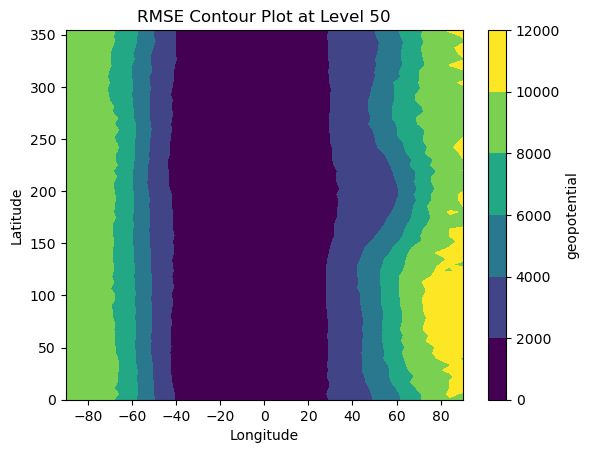

In [33]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming you have an xarray DataArray named 'rmse_dataarray' with dimensions ('level', 'longitude', 'latitude')

# Choose a specific level (e.g., level=50)
level_to_visualize = 50

# Select the RMSE values at the chosen level
rmse_slice = rmse.sel(level=level_to_visualize)

# Create a contour plot of the selected level
rmse_slice.plot.contourf(
    cmap='viridis',  # Colormap
    robust=True,  # Ensures that extreme values don't affect the color scale
)

# Add labels and a colorbar
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'RMSE Contour Plot at Level {level_to_visualize}')
plt.colorbar(label='RMSE Value')

# Show the plot
plt.show()


In [27]:
forecast_2022

<xarray.DataArray 'geopotential' (time: 366, level: 13, longitude: 64,
                                  latitude: 32)>
dask.array<array, shape=(366, 13, 64, 32), dtype=float64, chunksize=(366, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365 366
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0

In [230]:
observations["geopotential"].sel(time=slice('2021-01-01', '2021-12-31'))

<xarray.DataArray 'geopotential' (time: 1460, level: 13, longitude: 64,
                                  latitude: 32)>
dask.array<getitem, shape=(1460, 13, 64, 32), dtype=float32, chunksize=(100, 13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [ ]:
observations.sel(time=slice(2021-01-01,))

In [200]:
forecasts_finale = estimate_gaussian_parameters(test_forecast)
forecasts_finale

<xarray.Dataset>
Dimensions:       (dayofyear: 366, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * dayofyear     (dayofyear) int64 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Data variables:
    geopotential  (dayofyear, level, longitude, latitude) float64 dask.array<chunksize=(366, 13, 64, 32), meta=np.ndarray>

In [209]:
import zarr

# Specify the path where you want to store your Zarr data
zarr_store = zarr.DirectoryStore('Users/davidhuang/Downloads/Probabilistic-Weather-Forecasting-')

import xarray as xr

# Assuming you have a Dataset or DataArray named 'forecasts_finale' and a Zarr store named 'zarr_store'
forecasts_finale.to_zarr(store=zarr_store, mode='w')  # 'w' mode will write the data to the store

loaded_data = xr.open_zarr(zarr_store)
loaded_data

<xarray.Dataset>
Dimensions:       (dayofyear: 366, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * dayofyear     (dayofyear) int64 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
Data variables:
    geopotential  (dayofyear, level, longitude, latitude) float64 dask.array<chunksize=(366, 13, 64, 32), meta=np.ndarray>

In [210]:
from weatherbench2 import config
paths = config.Paths(
    forecast='Users/davidhuang/Downloads/Probabilistic-Weather-Forecasting-',
    obs=obs_path,
    output_dir='./',   # Directory to save evaluation results
)
selection = config.Selection(
    variables=[
        'geopotential',
    ],
    levels=[500, 700, 850],
    time_slice=slice('2020-01-01', '2020-12-31'),
)
data_config = config.Data(selection=selection, paths=paths)

from weatherbench2.metrics import RMSE, ACC

eval_configs = {
  'deterministic': config.Eval(
      metrics={
          'rmse': RMSE(), 
          'acc': ACC(climatology=climatology) 
      },
  )
}

from weatherbench2.evaluation import evaluate_in_memory, evaluate_with_beam
evaluate_in_memory(data_config, eval_configs)   # Takes around 5 minutes
results = xr.open_dataset('./deterministic.nc')
results['geopotential'].sel(metric='acc', level=500, region='global').plot()

KeyError: "'init_time' is not a valid dimension or coordinate"

In [ ]:
data_config = config.Data(selection=selection, paths=paths)

In [279]:
climate = climatology_probabilistic_model(observations, variable="geopotential")

In [290]:
climate.sel(years=1959, dayofyear=1)

<xarray.Dataset>
Dimensions:    (latitude: 32, level: 13, longitude: 64)
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
    dayofyear  int64 1
    years      int64 1959
Data variables:
    *empty*

In [127]:
for var_name, data_var in climate.data_vars.items():
    data_var
    break

In [128]:
import xarray as xr

# Load or create your xarray dataset here
# Your dataset should have data variables named after years (e.g., "1959," "1960," etc.)

# Get a list of the data variables (years)
data_vars = climate.data_vars

# Convert data variables to a list of xarray DataArrays
data_arrays = [climate[year] for year in data_vars]

# Create a new coordinate variable "time" using the years as values
time_values = [int(year) for year in data_vars]
time_coord = xr.DataArray(time_values, dims='time', name='time')

# Concatenate the data arrays along the new "time" dimension
your_dataset_with_time = xr.concat(data_arrays, dim=time_coord)

# Now, your_dataset_with_time has a "time" coordinate with the data variables along it.
your_dataset_with_time

,Array,Chunk
Bytes,6.40 MiB,104.00 kiB
Shape,"(63, 13, 64, 32)","(1, 13, 64, 32)"
Count,117142 Tasks,63 Chunks
Type,float32,numpy.ndarray


In [158]:
import xarray as xr

# Load or create your xarray dataset here

# Calculate the mean across data variables (years) along the 'time' dimension
mean_across_years = test_forecast.mean(dim='years')
std_dev_across_years = test_forecast.std(dim='years')

# 'mean_across_years' now contains the mean across data variables (years)

mean_across_years
std_dev_across_years

<xarray.Dataset>
Dimensions:       (dayofyear: 366, level: 13, longitude: 64, latitude: 32)
Coordinates:
  * dayofyear     (dayofyear) int64 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * level         (level) int64 50 100 150 200 250 300 ... 600 700 850 925 1000
  * longitude     (longitude) float64 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * latitude      (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
Data variables:
    geopotential  (dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(366, 13, 64, 32), meta=np.ndarray>

In [129]:
import xarray as xr

# Load or create your xarray dataset here

# Calculate the mean across data variables (years) along the 'time' dimension
mean_across_years = your_dataset_with_time.mean(dim='time')
std_dev_across_years = your_dataset_with_time.std(dim='time')

# 'mean_across_years' now contains the mean across data variables (years)

mean_across_years
std_dev_across_years

<xarray.DataArray 1959 (level: 13, longitude: 64, latitude: 32)>
dask.array<_sqrt, shape=(13, 64, 32), dtype=float32, chunksize=(13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4

your_dataset_with_time.sel(level=50)[]

In [131]:
std_dev_across_years.sel(level=50).values

array([[1277.1989, 1255.08  , 1184.588 , ..., 2736.268 , 2758.337 ,
        2958.0417],
       [1280.9536, 1265.9424, 1192.2178, ..., 2679.387 , 2732.1436,
        2953.537 ],
       [1284.7253, 1278.1621, 1205.0624, ..., 2634.3975, 2711.2695,
        2950.4575],
       ...,
       [1266.1804, 1230.2499, 1186.4874, ..., 2959.192 , 2859.526 ,
        2979.3728],
       [1269.792 , 1237.404 , 1183.3044, ..., 2879.6353, 2822.7769,
        2971.0635],
       [1273.4573, 1245.6168, 1181.9744, ..., 2803.7583, 2788.757 ,
        2963.8828]], dtype=float32)

In [132]:
mean_across_years.sel(level=50).values


array([[202085.2 , 201941.62, 201722.42, ..., 189147.27, 188449.86,
        188484.44],
       [202082.9 , 201936.34, 201716.14, ..., 189092.61, 188416.7 ,
        188471.83],
       [202081.2 , 201932.6 , 201713.08, ..., 189029.05, 188383.94,
        188461.45],
       ...,
       [202094.98, 201965.64, 201761.36, ..., 189246.12, 188548.64,
        188531.45],
       [202091.2 , 201955.97, 201745.36, ..., 189224.8 , 188515.8 ,
        188514.  ],
       [202087.94, 201947.92, 201731.89, ..., 189192.2 , 188482.95,
        188498.22]], dtype=float32)

In [133]:
mean_across_years.sel(level=50).values.shape

(64, 32)

In [139]:
std_dev_across_years

<xarray.DataArray 1959 (level: 13, longitude: 64, latitude: 32)>
dask.array<_sqrt, shape=(13, 64, 32), dtype=float32, chunksize=(13, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4

In [168]:
std_dev_across_years.coords

Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0

In [178]:
import xarray as xr
import numpy as np
from scipy.stats import norm

# Assuming you have std_dev_across_years and mean_across_years with the specified dimensions

# Generate Gaussian predictions for each coordinate vectorized
std_dev = std_dev_across_years["geopotential"].values
mean = mean_across_years["geopotential"].values

# Generate random samples following a Gaussian distribution for all coordinates
samples = norm.rvs(loc=mean, scale=std_dev)
samples

array([[[[ 2.02376229e+05,  1.99833919e+05,  1.99134183e+05, ...,
           1.92698417e+05,  1.89456047e+05,  1.87157886e+05],
         [ 2.01091814e+05,  2.01055552e+05,  2.01003207e+05, ...,
           1.90181226e+05,  1.91336428e+05,  1.86457016e+05],
         [ 2.02573644e+05,  2.02360202e+05,  1.99732858e+05, ...,
           1.85187261e+05,  1.87481368e+05,  1.89911165e+05],
         ...,
         [ 2.01045685e+05,  2.00690587e+05,  2.00068559e+05, ...,
           1.88971800e+05,  1.93491575e+05,  1.89102308e+05],
         [ 2.03237592e+05,  1.99397809e+05,  2.02045620e+05, ...,
           1.94239217e+05,  1.86827586e+05,  1.86993819e+05],
         [ 2.02316799e+05,  2.00575874e+05,  2.00813996e+05, ...,
           1.86829715e+05,  1.89115827e+05,  1.85060367e+05]],

        [[ 1.55969941e+05,  1.55156110e+05,  1.55189577e+05, ...,
           1.51705602e+05,  1.46947308e+05,  1.50757997e+05],
         [ 1.52730291e+05,  1.56818635e+05,  1.51827258e+05, ...,
           1.48772913e

In [ ]:
forecast_probabilities = xr.Dataset(
            {
                'dayofyear': ('dayofyear', np.arange(1, 366)),
                'level': ('level', level_arr_da),
                'longitude': ('longitude', longitude_arr_da),
                'latitude': ('latitude', latitude_arr_da),
                'years': ('years', years),
            }
        )

In [188]:
std_dev_across_years.dims

Frozen({'dayofyear': 366, 'level': 13, 'longitude': 64, 'latitude': 32})

In [189]:
samples_da = da.from_array(samples, chunks='auto')
gaussian_predictions = xr.DataArray(
        dims=(std_dev_across_years.dims),
        coords=std_dev_across_years.coords,
        name="gaussian_predictions"
)

geopotential_predictions = xr.DataArray(
    samples_da,
    dims=(std_dev_across_years.dims),
    coords=std_dev_across_years.coords,
    name='geopotential_predictions',  # Provide a name for the DataArray
)

new_geopotential_predictions = {"geopotential": geopotential_predictions}
# Set the values in the forecast_probabilities dataset for the current year
gaussian_predictions = xr.merge([gaussian_predictions, new_geopotential_predictions])

gaussian_predictions

<xarray.Dataset>
Dimensions:               (dayofyear: 366, level: 13, longitude: 64,
                           latitude: 32)
Coordinates:
  * dayofyear             (dayofyear) int64 1 2 3 4 5 6 ... 362 363 364 365 366
  * level                 (level) int64 50 100 150 200 250 ... 700 850 925 1000
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * latitude              (latitude) float64 -90.0 -84.19 -78.39 ... 84.19 90.0
Data variables:
    gaussian_predictions  (dayofyear, level, longitude, latitude) float64 nan...
    geopotential          (dayofyear, level, longitude, latitude) float64 dask.array<chunksize=(366, 13, 64, 32), meta=np.ndarray>

In [151]:
import xarray as xr
import numpy as np
from scipy.stats import norm

# Assuming you have std_dev_across_years and mean_across_years with the specified dimensions

# Generate Gaussian predictions for each coordinate vectorized
std_dev = std_dev_across_years.values
mean = mean_across_years.values

# Generate random samples following a Gaussian distribution for all coordinates
samples = norm.rvs(loc=mean, scale=std_dev)

# Reshape the samples to match the shape of the original DataArray
samples = samples.reshape(std_dev_across_years.shape)

# Create a new xarray DataArray with 'samples' as a data variable
gaussian_predictions = xr.DataArray(
    samples,  # 'samples' as the data
    coords=std_dev_across_years.coords,  # Inherit coordinates
)

# Now, 'gaussian_predictions' contains 'samples' as a data variable


In [157]:
gaussian_predictions

<xarray.DataArray (level: 13, longitude: 64, latitude: 32)>
array([[[ 2.01416661e+05,  2.01510689e+05,  2.01816462e+05, ...,
          1.92789773e+05,  1.88965918e+05,  1.88213005e+05],
        [ 2.01459848e+05,  2.01816047e+05,  2.04620889e+05, ...,
          1.88312206e+05,  1.90126436e+05,  1.88189637e+05],
        [ 2.02604786e+05,  2.01887002e+05,  2.02942293e+05, ...,
          1.90364327e+05,  1.92467563e+05,  1.93285492e+05],
        ...,
        [ 1.99902050e+05,  2.01976903e+05,  2.02325534e+05, ...,
          1.87628684e+05,  1.86708227e+05,  1.82747115e+05],
        [ 2.01434713e+05,  2.02576610e+05,  2.02826330e+05, ...,
          1.87416161e+05,  1.85245046e+05,  1.91361785e+05],
        [ 2.02823837e+05,  2.03723525e+05,  2.03272647e+05, ...,
          1.95148875e+05,  1.87812259e+05,  1.88746644e+05]],

       [[ 1.55196743e+05,  1.56958566e+05,  1.56969861e+05, ...,
          1.46920059e+05,  1.53222856e+05,  1.48399379e+05],
        [ 1.55812247e+05,  1.54654574e+05,  1.54770080e+05, ...,
          1.51455364e+05,  1.50137267e+05,  1.48722782e+05],
        [ 1.55603670e+05,  1.54471788e+05,  1.54894229e+05, ...,
          1.51023331e+05,  1.46810715e+05,  1.52556523e+05],
...
        [ 5.89190327e+03,  6.36426515e+03,  6.19954441e+03, ...,
          6.29945320e+03,  5.26421314e+03,  7.21547679e+03],
        [ 5.26748903e+03,  6.40464487e+03,  6.36657649e+03, ...,
          5.74885151e+03,  7.34043892e+03,  9.16756939e+03],
        [ 5.79350423e+03,  6.31724383e+03,  6.04877484e+03, ...,
          5.21550990e+03,  7.10384567e+03,  6.97301028e+03]],

       [[ 4.37077010e+02, -2.13597470e+02, -4.22817433e+02, ...,
         -1.14131295e+03,  1.49110339e+03,  8.18132755e+02],
        [ 2.52587840e+02, -1.14471231e+02, -7.89886161e+02, ...,
         -1.60319731e+02,  5.44351318e+02,  1.35971767e+03],
        [ 6.42621800e+01,  6.76610075e+02, -5.39982348e+02, ...,
         -6.93947225e+02,  2.90790044e+02, -8.62524015e+02],
        ...,
        [-3.18756098e+02,  5.17179069e+02, -2.96557564e+02, ...,
          2.01051042e+03,  5.87676277e+01,  1.58299874e+03],
        [-1.56005605e+02,  2.10624854e+02, -4.26486971e+01, ...,
         -5.61464917e+02,  2.15952060e+03,  1.09894838e+03],
        [ 2.30829025e+02, -3.76348766e+02,  1.22222946e+02, ...,
         -8.02469157e+02,  7.90692521e+02,  8.53654902e+02]]])
Coordinates:
  * latitude   (latitude) float64 -90.0 -84.19 -78.39 ... 78.39 84.19 90.0
  * level      (level) int64 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4